# Lab 7- Solutions



## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

The data is provided as a comma separated file.

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

We see that we have 5 million datapoints.

We create a new file of the first half million. This is sufficient for our needs in this lab:

In [1]:
!head -500000 SUSY.csv > SUSY-small.csv

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
ls -lh

total 2.5G
-rw-r--r-- 1 miriochoa miriochoa 385K Oct 18 14:24 Lab.7.ipynb
-rw-r--r-- 1 miriochoa miriochoa 5.9M Oct 18 13:40 Lab.7.pdf
-rw-r--r-- 1 miriochoa miriochoa 3.0M Nov 19 20:48 Lab.7.solution.ipynb
-rw-r--r-- 1 miriochoa miriochoa 228M Nov 20 03:34 SUSY-small.csv
-rw-r--r-- 1 miriochoa miriochoa 2.3G Oct 18 13:48 SUSY.csv


In [3]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [5]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames)) # only contains features in varnames that are not in rawnames

In [6]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [7]:
FeatureNames

['M_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'MT2',
 'S_R',
 'M_TR_2',
 'MET_rel',
 'axial_MET',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [9]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [10]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [12]:
#Splits df into two separate DF based on the signal (True or False)
df_sig=df[df.signal==1] ## 1 means there is a signal
df_bkg=df[df.signal==0] ## 0 is no signal therefore its background

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


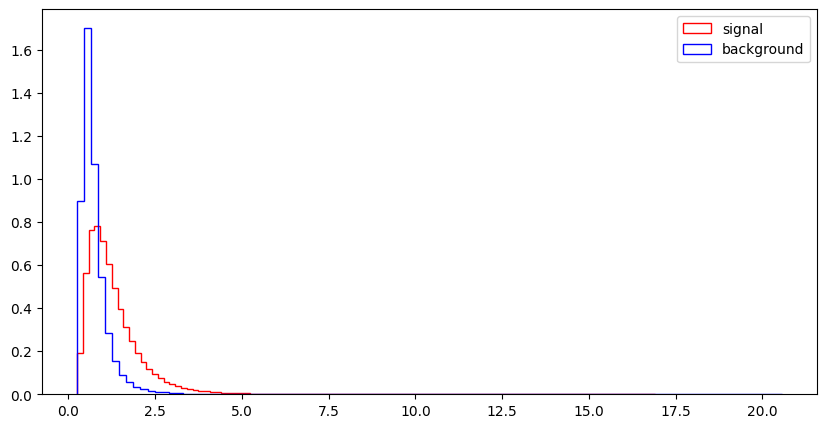

l_1_eta


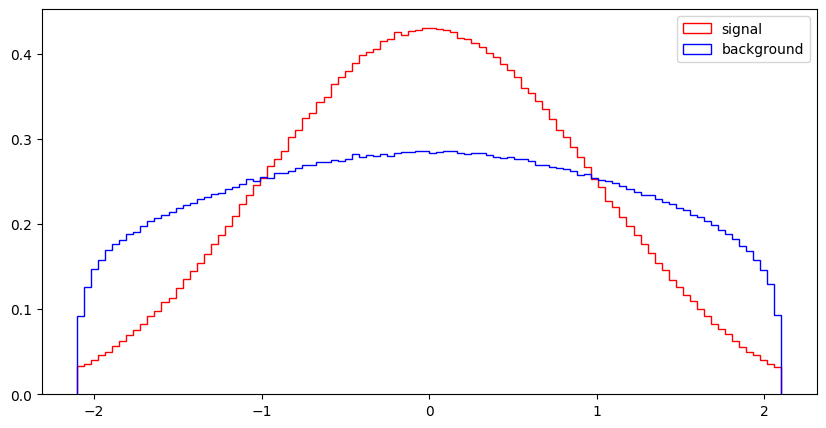

l_1_phi


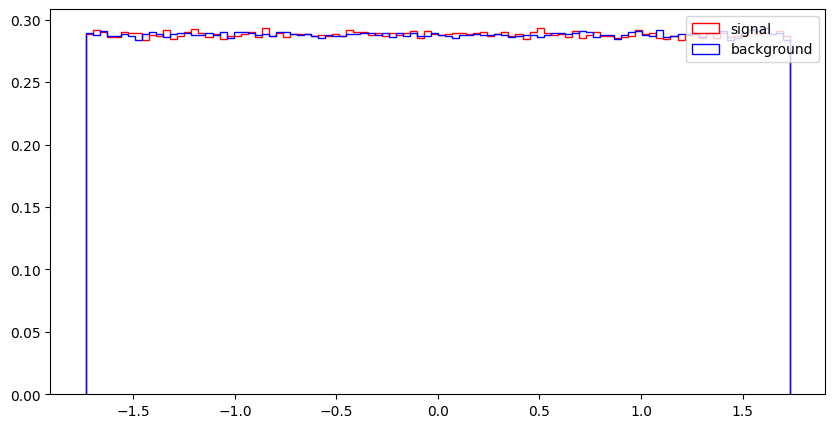

l_2_pT


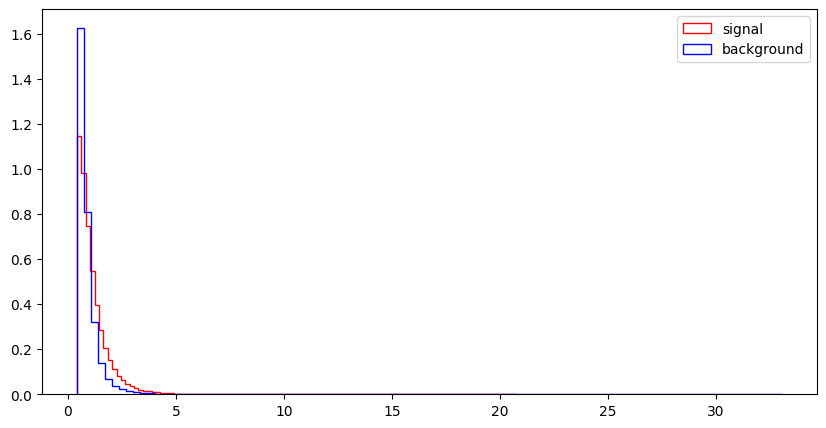

l_2_eta


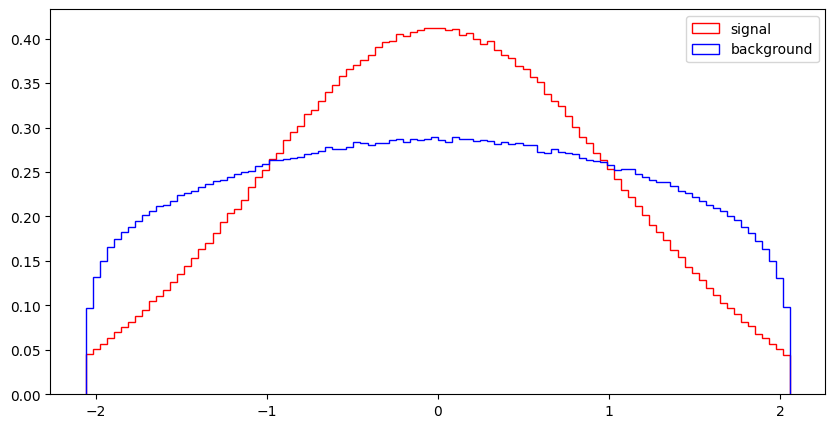

l_2_phi


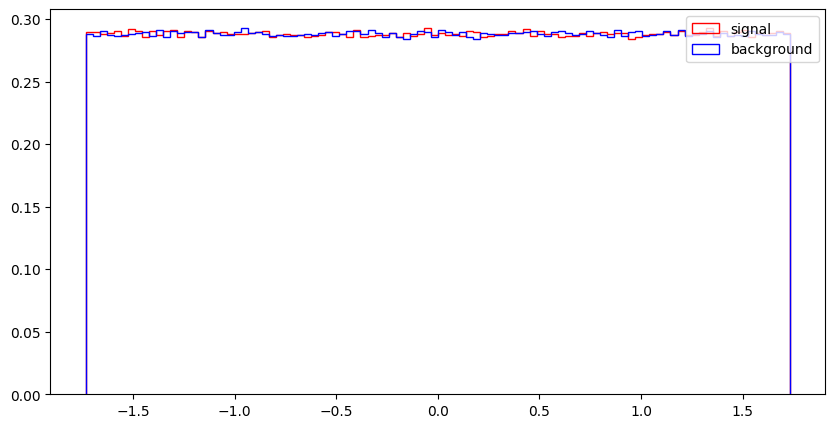

MET


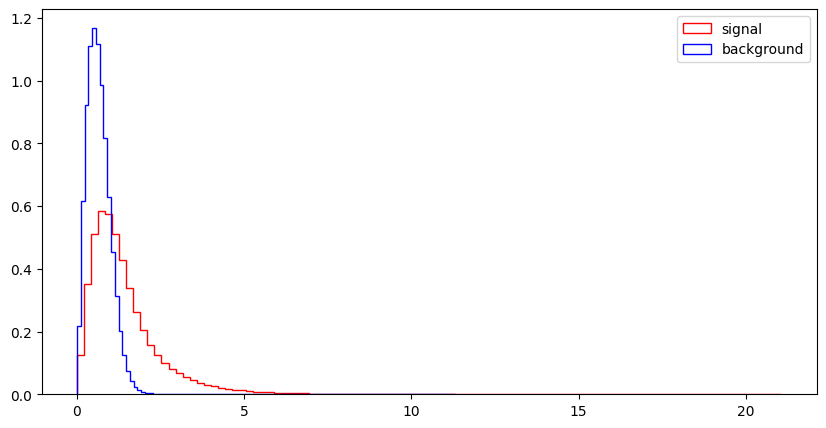

MET_phi


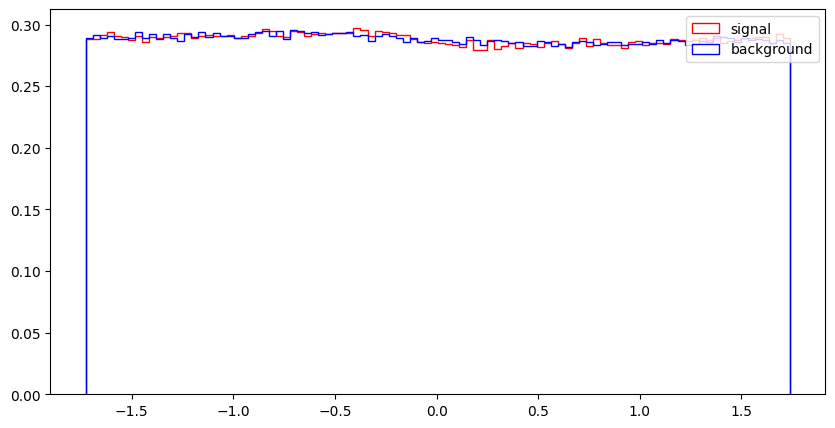

MET_rel


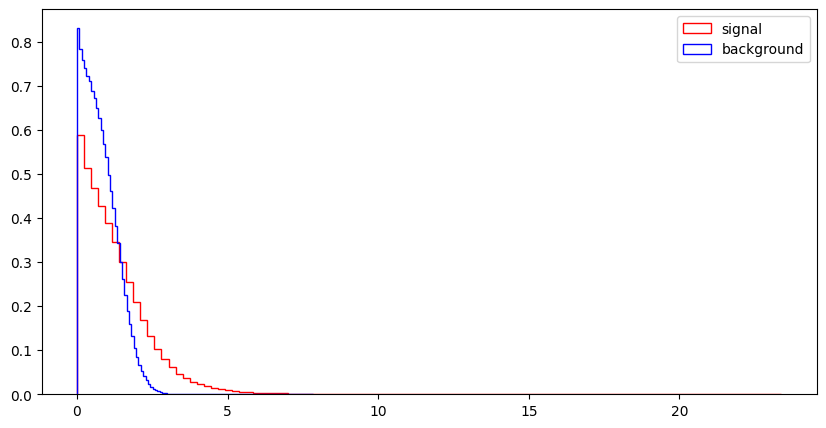

axial_MET


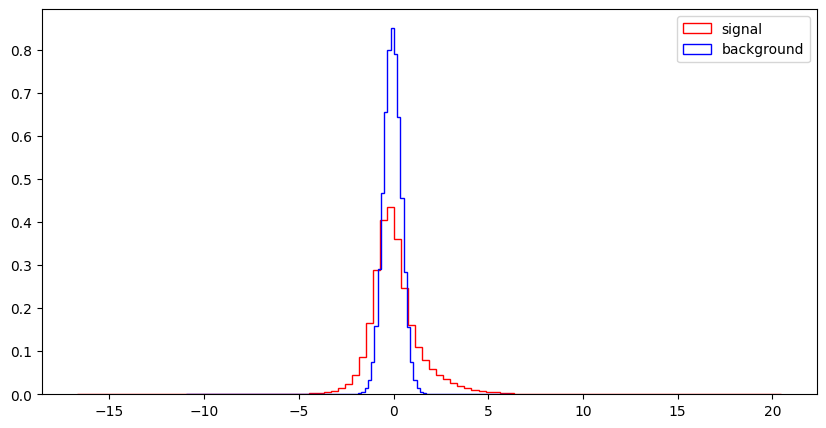

M_R


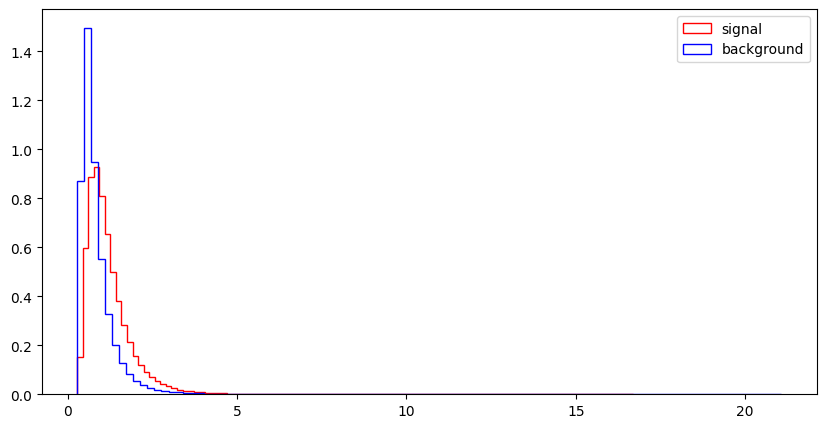

M_TR_2


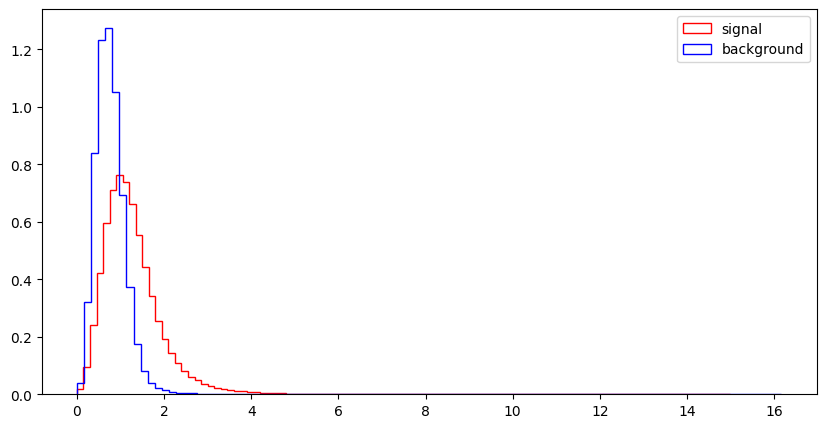

R


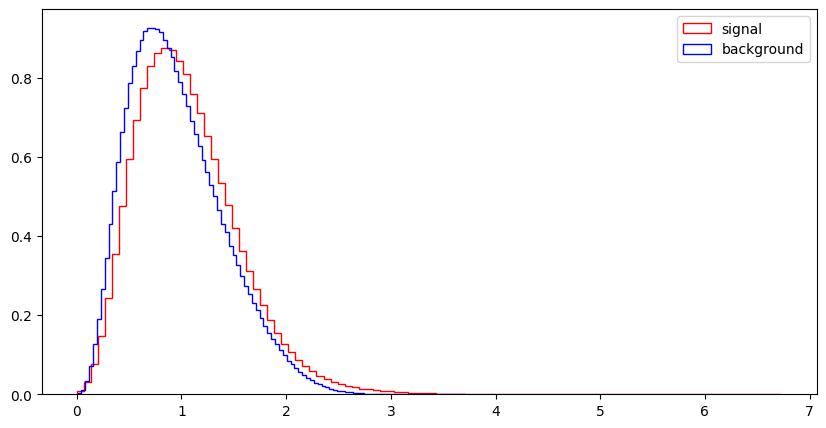

MT2


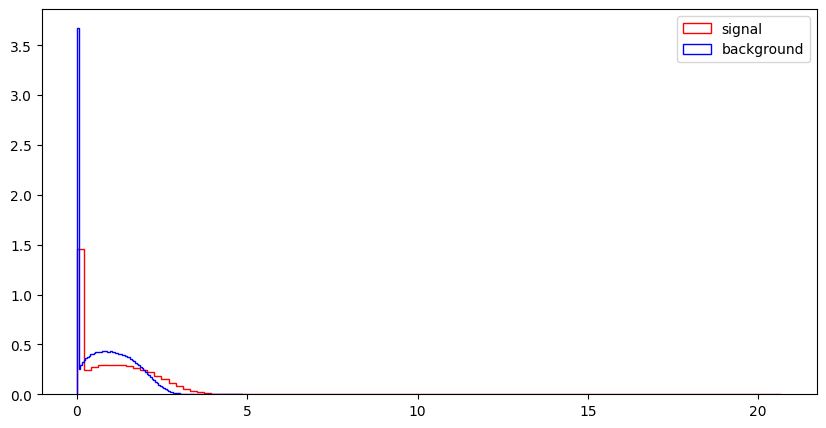

S_R


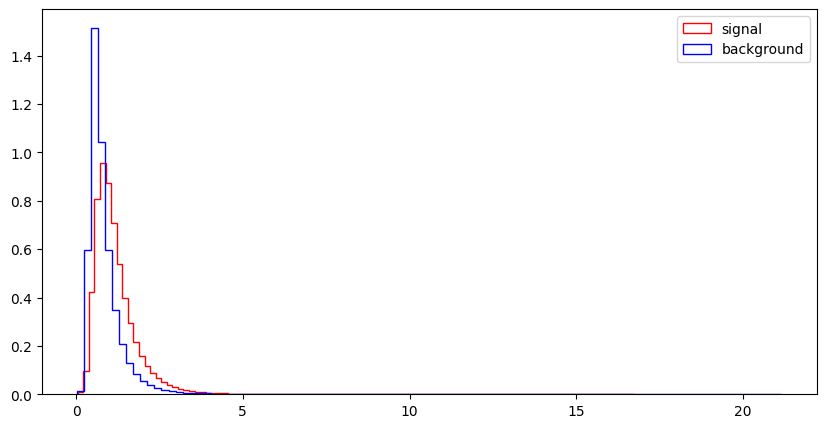

M_Delta_R


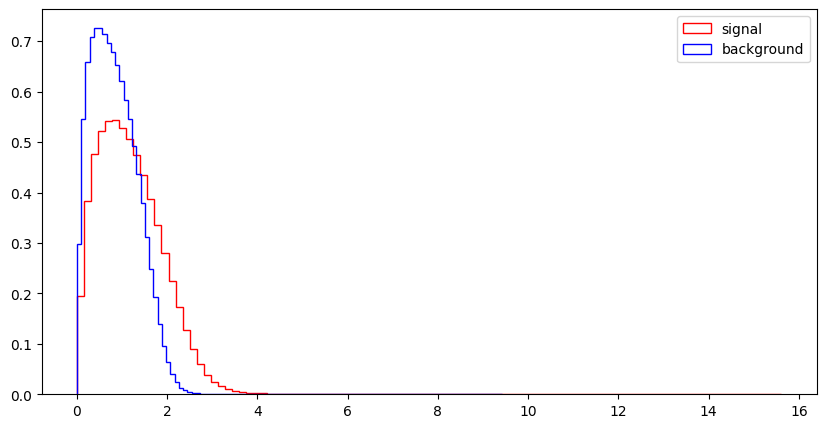

dPhi_r_b


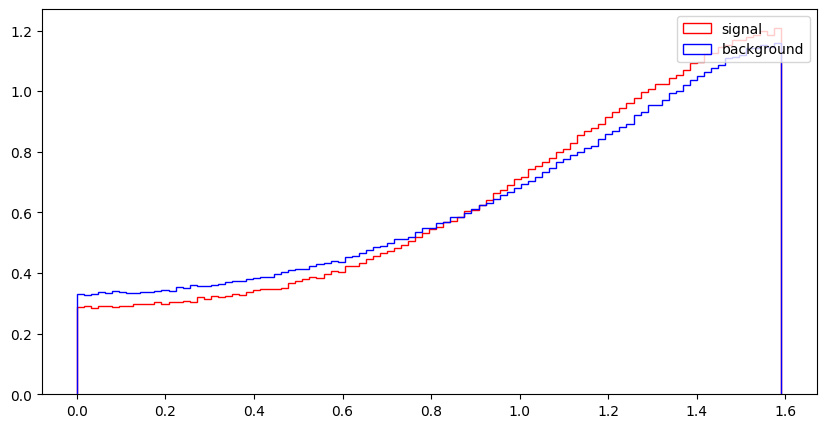

cos_theta_r1


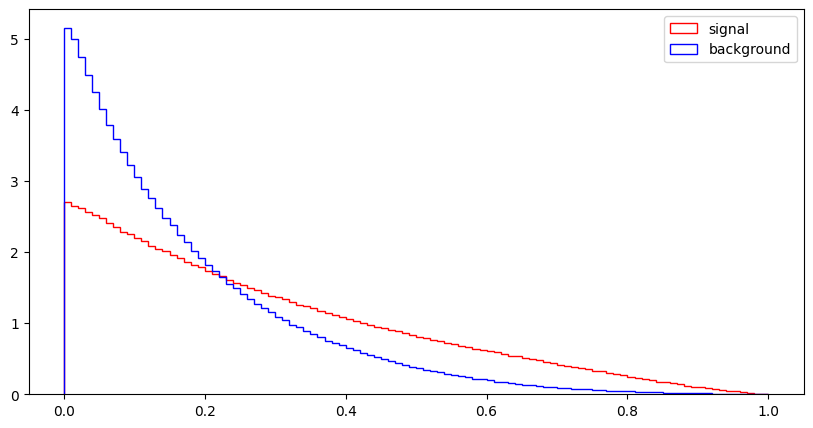

In [13]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [14]:
df.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

In [15]:
low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta','l_2_phi']
high_level_features = ['R', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 
                       'M_R', 'M_TR_2', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 
                       'cos_theta_r1']

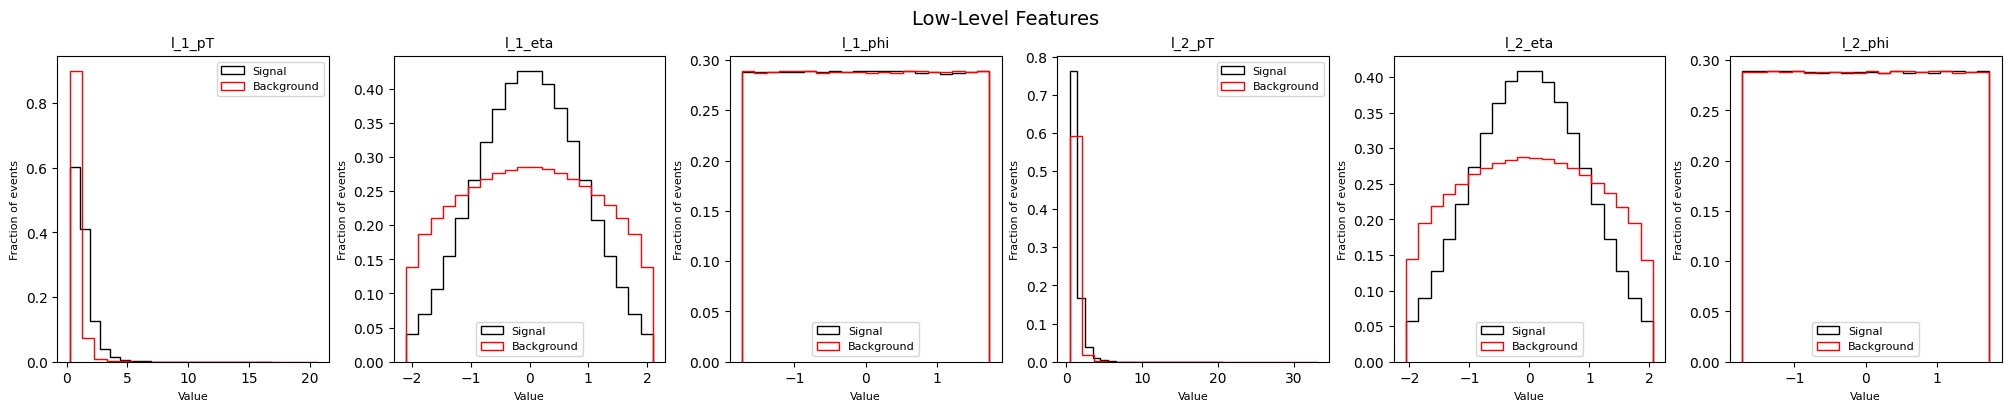

In [16]:
fig5, axes5 = plt.subplots(1, len(low_level_features), figsize=(20, 4), constrained_layout=True)

for i, feature in enumerate(low_level_features):
    ax = axes5[i]
    ax.hist(df_sig[feature], bins=20, histtype='step', color='black', label='Signal', density=True)
    ax.hist(df_bkg[feature], histtype='step',bins=20, color='red', label='Background', density=True)
    ax.set_title(feature, fontsize=10)
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Fraction of events", fontsize=8)
    ax.legend(fontsize=8)

fig5.suptitle("Low-Level Features", fontsize=14)
plt.show()

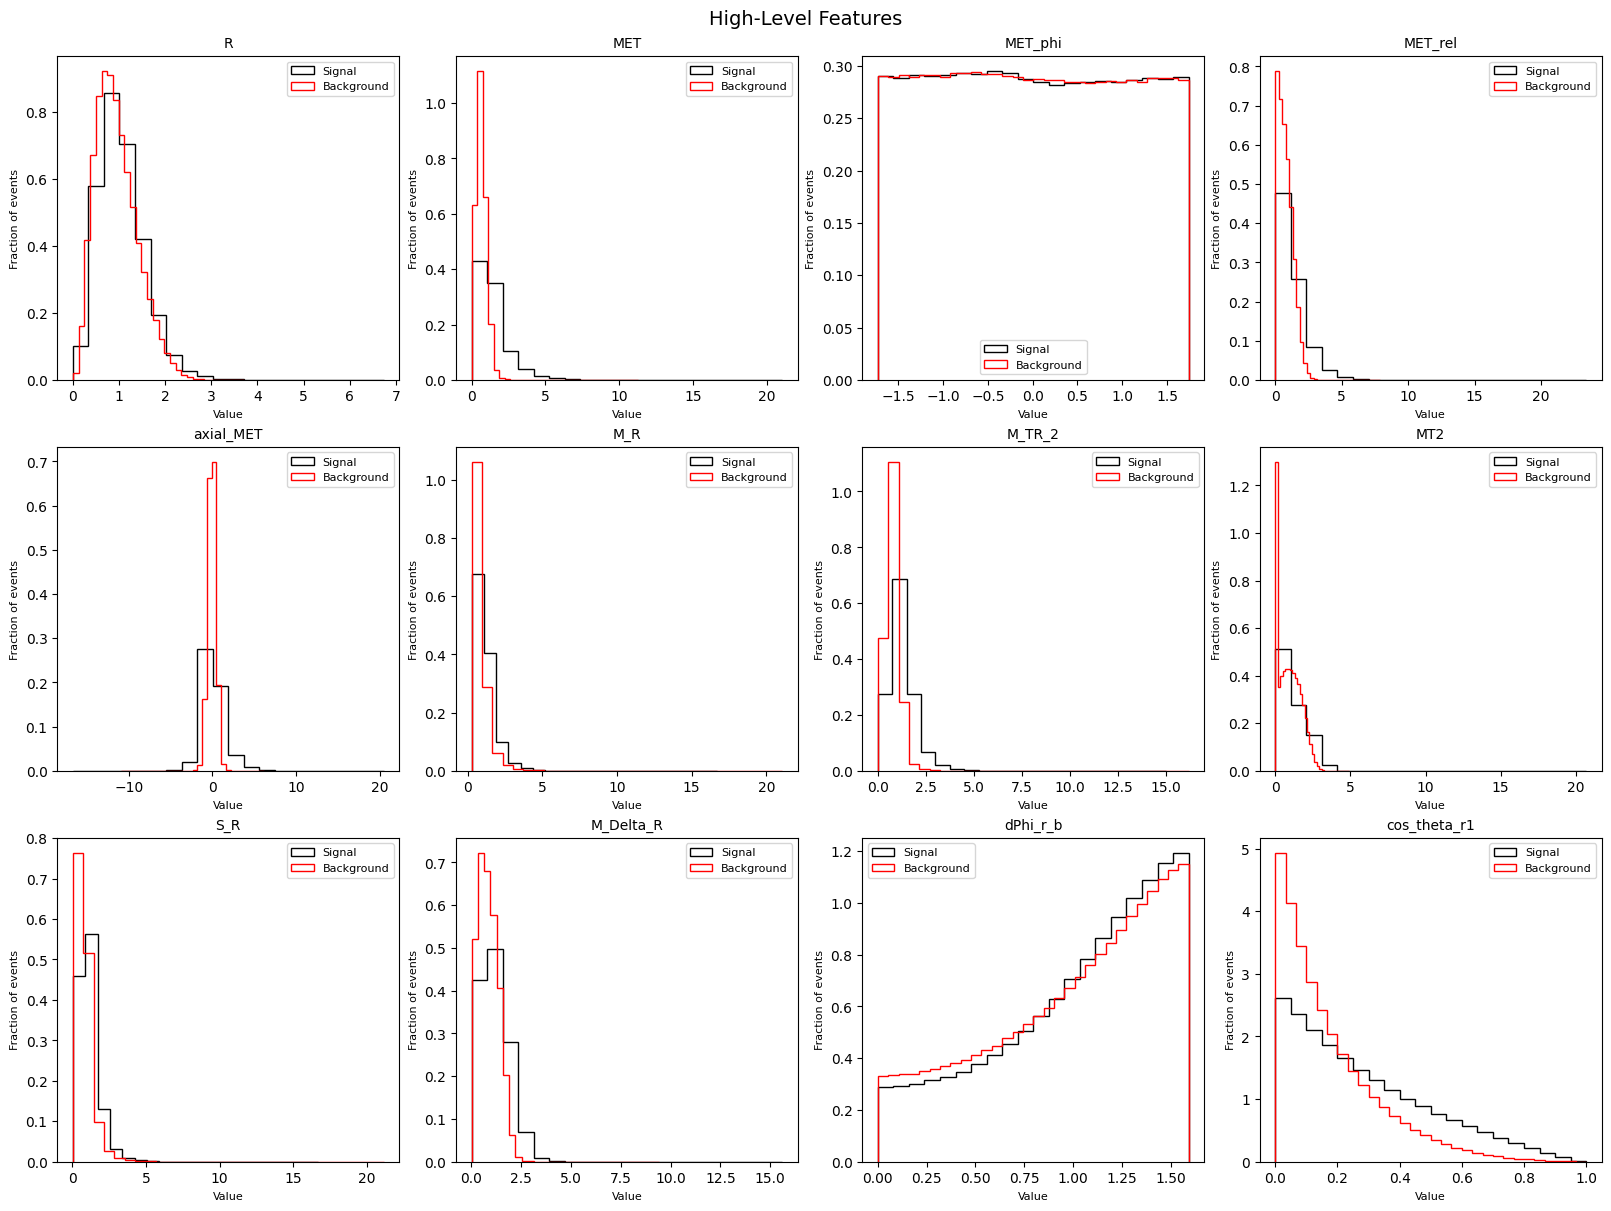

In [17]:
fig6, axes6 = plt.subplots(3, 4, figsize=(16, 12), constrained_layout=True)

for i, feature in enumerate(high_level_features):
    row, col = divmod(i, 4)  # Determine subplot row and column
    ax = axes6[row, col]
    ax.hist(df_sig[feature], bins=20, histtype='step', color='black', label='Signal', density=True)
    ax.hist(df_bkg[feature], bins=30, histtype='step', color='red', label='Background', density=True)
    ax.set_title(feature, fontsize=10)
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Fraction of events", fontsize=8)
    ax.legend(fontsize=8)
        
for j in range(len(high_level_features), len(axes6)):
    fig6.delaxes(axes6[j])
    
fig6.suptitle("High-Level Features", fontsize=14)
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

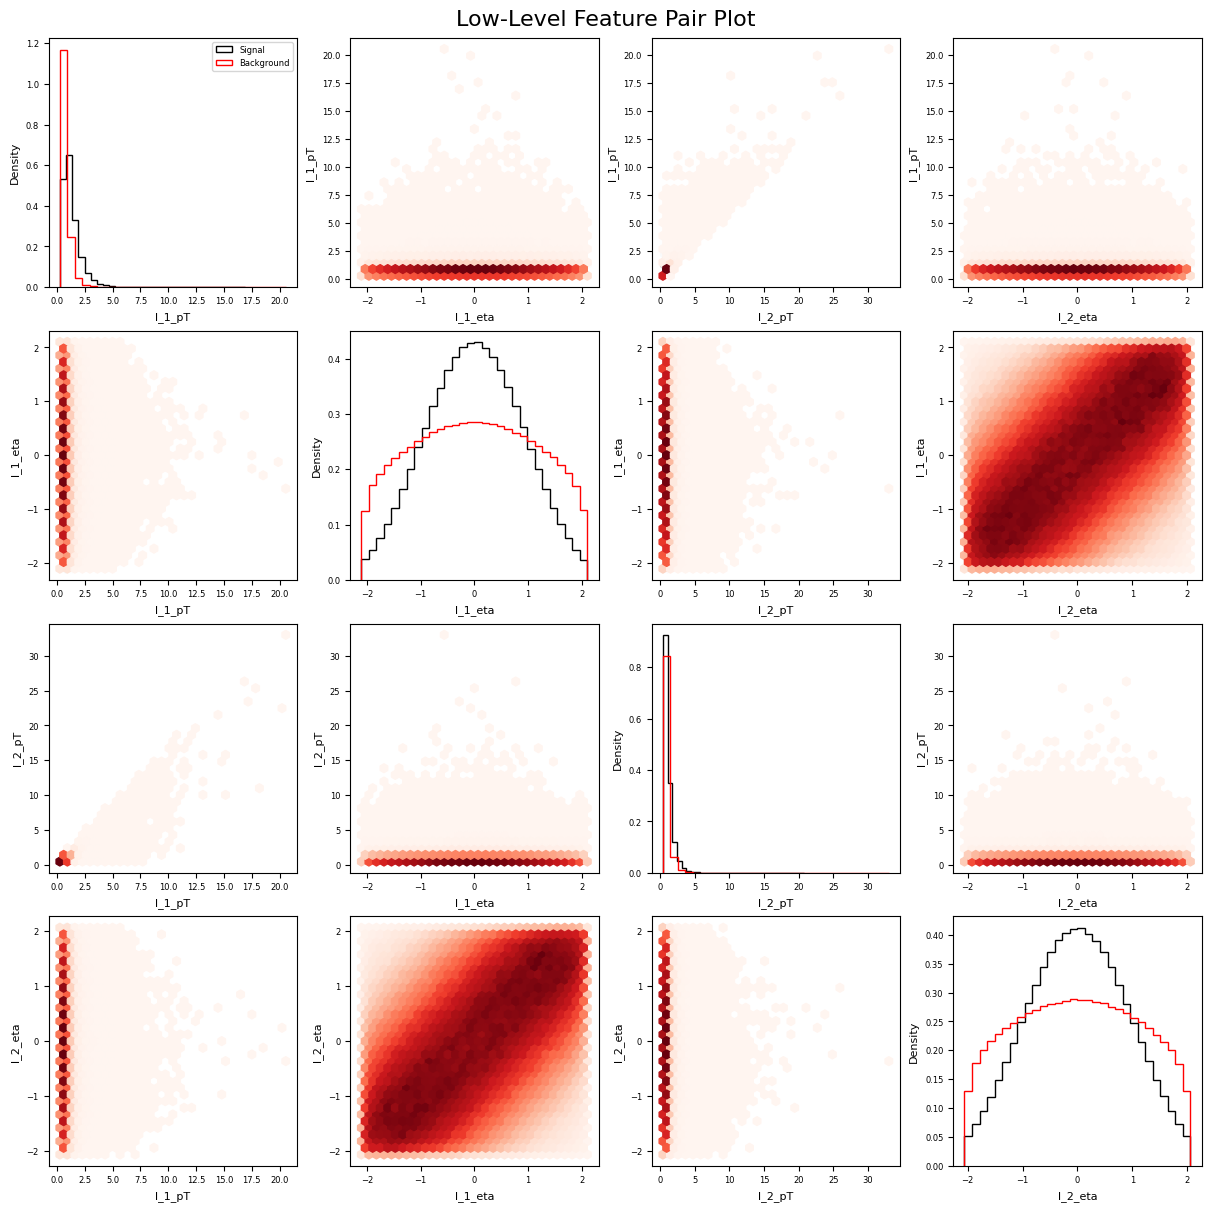

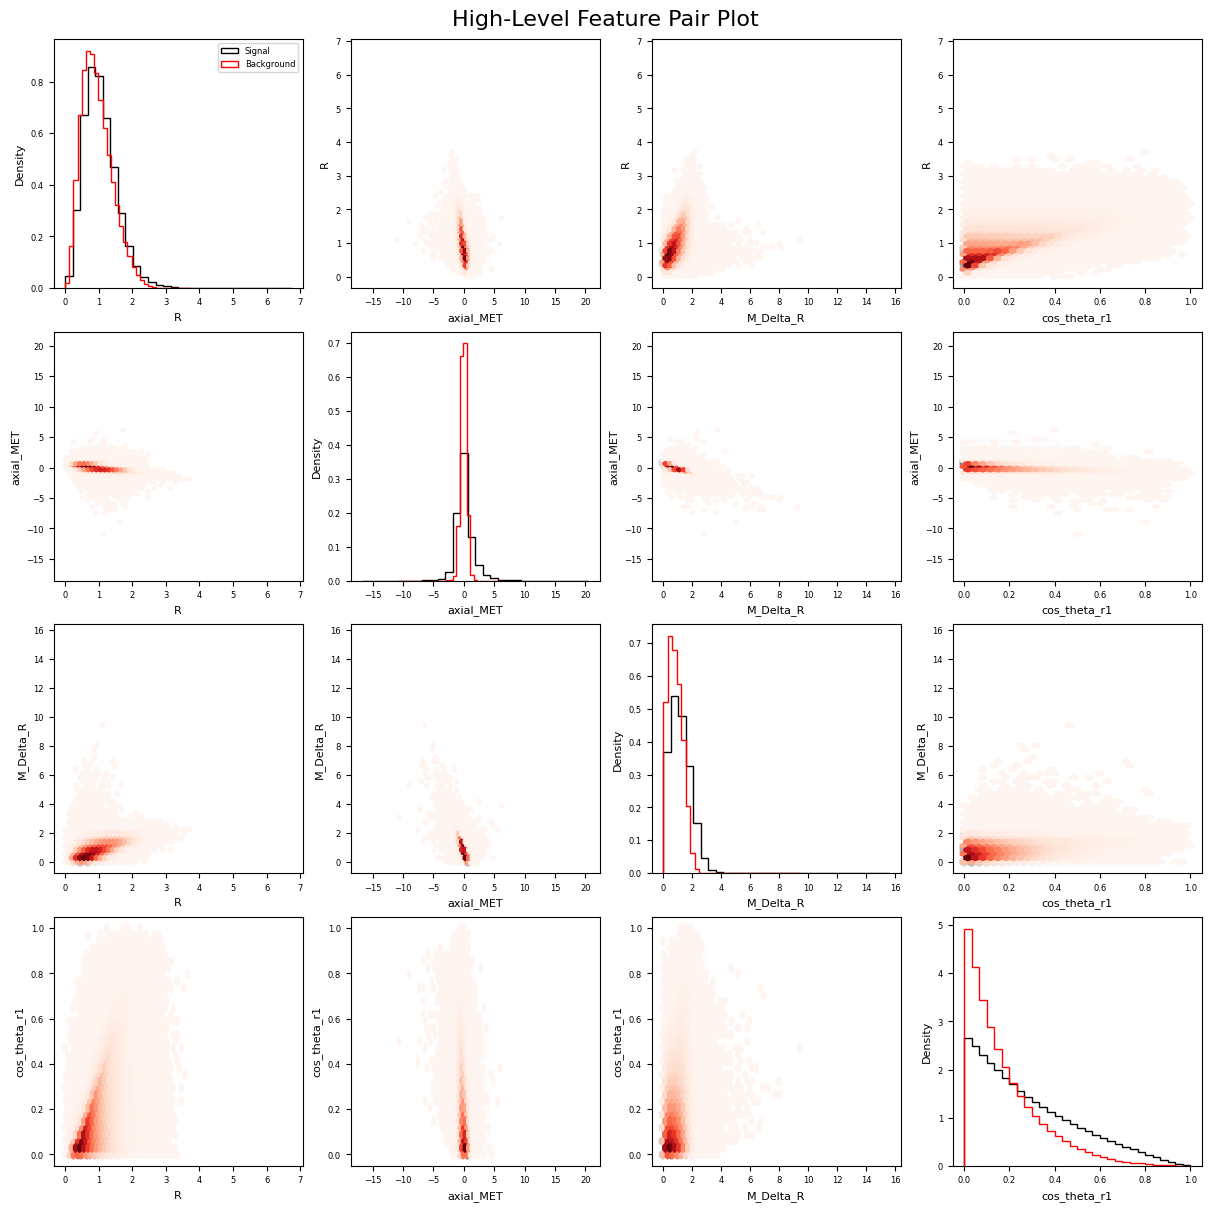

In [18]:
# Part a
def create_pair_plot(df_sig, df_bkg, features, title="Pair Plot", figsize=(12, 12)):

    features = [feature for feature in features if feature in df_sig.columns]

    if not features:
        raise ValueError("No valid features provided that exist in the DataFrame columns.")
    
    n_features = len(features)
    fig, axes = plt.subplots(n_features, n_features, figsize=figsize, constrained_layout=True)

    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            ax = axes[i, j]

            if i == j:  # Diagonal: Histogram
                ax.hist(df_sig[feature_i], bins=30, histtype='step', color='black', label='Signal', density=True)
                ax.hist(df_bkg[feature_i], bins=30, histtype='step', color='red', label='Background', density=True)
                ax.set_xlabel(feature_i, fontsize=8)
                ax.set_ylabel("Density", fontsize=8)
            else:  # Off-diagonal: Hexbin plot better to display density
                # Create hexbin plot for signal
                hb_sig = ax.hexbin(df_sig[feature_j], df_sig[feature_i], gridsize=30, cmap='Greys', mincnt=1)
                # Create hexbin plot for background
                hb_bkg = ax.hexbin(df_bkg[feature_j], df_bkg[feature_i], gridsize=30, cmap='Reds', mincnt=1)

                ax.set_xlabel(feature_j, fontsize=8)
                ax.set_ylabel(feature_i, fontsize=8)

            # Remove ticks for clarity
            ax.tick_params(axis='both', which='major', labelsize=6)

            # Add legend only in the top-left corner
            if i == 0 and j == 0:
                ax.legend(fontsize=6)

    fig.suptitle(title, fontsize=16)
    plt.show()

low_level_features = ["l_1_pT", "l_1_eta", "l_2_pT", "l_2_eta"]  # Replace with actual low-level feature names
high_level_features = ["R", "axial_MET", "M_Delta_R", "cos_theta_r1"]  # Replace with actual high-level feature names

low_level_features = [feature for feature in low_level_features if feature in df.columns]
high_level_features = [feature for feature in high_level_features if feature in df.columns]

create_pair_plot(df_sig, df_bkg, low_level_features, title="Low-Level Feature Pair Plot")
create_pair_plot(df_sig, df_bkg, high_level_features, title="High-Level Feature Pair Plot")


In [ ]:
# Part b
### change: computing the hist info for signal and background before plotting. 
import numpy as np
import matplotlib.pyplot as plt

def create_pair_plot(df_sig, df_bkg, features, title="Pair Plot"):
    # Precompute histograms for signal and background features to avoid recalculating
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    # Precompute histograms for the signal and background
    hist_data_sig = {}
    hist_data_bkg = {}
    bins_data = {}

    # Precompute histogram data for all features
    for feature in features:
        hist_data_sig[feature], bins_data[feature] = np.histogram(df_sig[feature], bins=30, density=True)
        hist_data_bkg[feature], _ = np.histogram(df_bkg[feature], bins=30, density=True)

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            feature_i = features[i]
            feature_j = features[j]
            
            if i == j:  # Diagonal: Histogram
                # Use precomputed histogram data
                ax.hist(df_sig[feature_i], bins=bins_data[feature_i], histtype='step', color='black', label="Signal", density=True)
                ax.hist(df_bkg[feature_i], bins=bins_data[feature_i], histtype='step', color='red', label="Background", density=True)
                ax.set_xlabel(feature_i, fontsize=8)
                ax.set_ylabel("Density", fontsize=8)
                ax.legend(loc='upper right')

            else:  # Off-diagonal: Scatter plot
                ax.scatter(df_sig[feature_i], df_sig[feature_j], color='black', label='Signal', alpha=0.5, s=5)
                ax.scatter(df_bkg[feature_i], df_bkg[feature_j], color='red', label='Background', alpha=0.5, s=5)
                ax.set_xlabel(feature_i, fontsize=8)
                ax.set_ylabel(feature_j, fontsize=8)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplots to make room for suptitle
    plt.show()

# Example usage
low_level_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
high_level_features = ["MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# Assuming df_sig and df_bkg are already defined DataFrames with signal and background data
create_pair_plot(df_sig, df_bkg, low_level_features, "Low-level Feature Pair Plot")
create_pair_plot(df_sig, df_bkg, high_level_features, "High-level Feature Pair Plot")


Part. c
The features that seem to have the max differences in the way the signal stands out from the background are: cos theta r1, axial met, and l2eta.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [20]:
# a
!pip install tabulate

In [21]:
# b
def compute_and_display_matrices(df, features, title):
    data = df[features].values.T  # Transpose to align rows with features

    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)
    
    # Display matrices 
    print(f"{title} - Covariance Matrix:")
    print("Features:", features)
    for i, row in enumerate(cov_matrix):
        print(f"{features[i]}: {row}")
    print("\n")
    
    print(f"{title} - Correlation Matrix:")
    print("Features:", features)
    for i, row in enumerate(corr_matrix):
        print(f"{features[i]}: {row}")
    print("\n")

# Define the low-level and high-level features
low_level_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
high_level_features = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# Compute and display for low-level features
compute_and_display_matrices(df, low_level_features, "Low-Level Features")

# Compute and display for high-level features
compute_and_display_matrices(df, high_level_features, "High-Level Features")

Low-Level Features - Covariance Matrix:
Features: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
l_1_pT: [ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
 -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04]
l_1_eta: [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
  4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04]
l_1_phi: [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
  6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01]
l_2_pT: [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
 -4.54288205e-04  1.14725700e-04  7.97039608e-02 -1.38807284e-03]
l_2_eta: [-3.02456872e-04  4.05877394e-01  6.41115931e-04 -4.54288205e-04
  1.00568572e+00 -6.47265749e-05  5.11898819e-05 -1.25591734e-04]
l_2_phi: [ 2.27164310e-04  2.97083862e-04 -2.68130132e-01  1.14725700e-04
 -6.47265749e-05  1.00326487e+00  4.32091479e-06 -3.44683883e-02]
MET: [ 2.30950772e-01 -5.5768

In [25]:
# c
from IPython.display import HTML, display
from tabulate import tabulate
import numpy as np

def compute_and_embed_matrices(df, features, title):
    # Extract data for the selected features
    data = df[features].values.T  # Transpose to align rows with features

    # Compute covariance and correlation matrices
    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)

    # Format matrices for tabulate
    headers = ["Feature"] + features
    cov_table = [[features[i]] + [f"{val:.4g}" for val in cov_matrix[i]] for i in range(len(features))]
    corr_table = [[features[i]] + [f"{val:.4g}" for val in corr_matrix[i]] for i in range(len(features))]

    # Convert tables to HTML and display them
    display(HTML(f"<h3>{title} - Covariance Matrix</h3>"))
    display(HTML(tabulate(cov_table, headers=headers, tablefmt='html')))

    display(HTML(f"<h3>{title} - Correlation Matrix</h3>"))
    display(HTML(tabulate(corr_table, headers=headers, tablefmt='html')))

# Define low-level and high-level features
low_level_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
high_level_features = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# display
compute_and_embed_matrices(df, low_level_features, "Low-Level Features")
compute_and_embed_matrices(df, high_level_features, "High-Level Features")


Feature,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.4724,-0.0002627,-0.0002291,0.3079,-0.0003025,0.0002272,0.231,-0.0006764
l_1_eta,-0.0002627,1.006,0.0003216,-0.0003779,0.4059,0.0002971,-0.0005577,-0.0005406
l_1_phi,-0.0002291,0.0003216,1.003,-0.0001285,0.0006411,-0.2681,0.0012,-0.1842
l_2_pT,0.3079,-0.0003779,-0.0001285,0.428,-0.0004543,0.0001147,0.0797,-0.001388
l_2_eta,-0.0003025,0.4059,0.0006411,-0.0004543,1.006,-6.473e-05,5.119e-05,-0.0001256
l_2_phi,0.0002272,0.0002971,-0.2681,0.0001147,-6.473e-05,1.003,4.321e-06,-0.03447
MET,0.231,-0.0005577,0.0012,0.0797,5.119e-05,4.321e-06,0.7619,-0.001622
MET_phi,-0.0006764,-0.0005406,-0.1842,-0.001388,-0.0001256,-0.03447,-0.001622,1.003


Feature,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000381,-0.0003327,0.6847,-0.0004388,0.00033,0.3849,-0.0009824
l_1_eta,-0.000381,1,0.0003201,-0.0005758,0.4035,0.0002957,-0.0006369,-0.0005381
l_1_phi,-0.0003327,0.0003201,1,-0.0001962,0.0006382,-0.2672,0.001373,-0.1836
l_2_pT,0.6847,-0.0005758,-0.0001962,1,-0.0006924,0.0001751,0.1396,-0.002118
l_2_eta,-0.0004388,0.4035,0.0006382,-0.0006924,1,-6.444e-05,5.848e-05,-0.000125
l_2_phi,0.00033,0.0002957,-0.2672,0.0001751,-6.444e-05,1,4.942e-06,-0.03436
MET,0.3849,-0.0006369,0.001373,0.1396,5.848e-05,4.942e-06,1,-0.001855
MET_phi,-0.0009824,-0.0005381,-0.1836,-0.002118,-0.000125,-0.03436,-0.001855,1


Feature,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,0.7924,-0.1253,0.04371,0.3033,0.2495,0.41,0.08242,0.4157,0.1466,0.0556
axial_MET,-0.1253,1.003,0.0151,-0.1887,-0.1816,-0.4603,-0.04342,-0.2341,-0.02621,-0.05413
M_R,0.04371,0.0151,0.3954,0.2122,-0.1129,-0.03662,0.3831,0.07428,-0.02913,-0.01419
M_TR_2,0.3033,-0.1887,0.2122,0.3412,0.1045,0.1895,0.2304,0.2425,0.05813,0.05195
R,0.2495,-0.1816,-0.1129,0.1045,0.2217,0.2322,-0.08343,0.1656,0.08713,0.05818
MT2,0.41,-0.4603,-0.03662,0.1895,0.2322,0.7383,-0.01117,0.4333,0.02117,0.04453
S_R,0.08242,-0.04342,0.3831,0.2304,-0.08343,-0.01117,0.3853,0.09614,-0.003632,-0.01022
M_Delta_R,0.4157,-0.2341,0.07428,0.2425,0.1656,0.4333,0.09614,0.3891,0.04239,0.0392
dPhi_r_b,0.1466,-0.02621,-0.02913,0.05813,0.08713,0.02117,-0.003632,0.04239,0.1902,0.009129
cos_theta_r1,0.0556,-0.05413,-0.01419,0.05195,0.05818,0.04453,-0.01022,0.0392,0.009129,0.0388


Feature,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,1,-0.1405,0.07808,0.5834,0.5953,0.5361,0.1492,0.7486,0.3776,0.3171
axial_MET,-0.1405,1,0.02398,-0.3226,-0.3852,-0.5349,-0.06984,-0.3747,-0.06,-0.2743
M_R,0.07808,0.02398,1,0.5776,-0.3814,-0.06778,0.9814,0.1894,-0.1062,-0.1146
M_TR_2,0.5834,-0.3226,0.5776,1,0.3798,0.3776,0.6356,0.6655,0.2282,0.4515
R,0.5953,-0.3852,-0.3814,0.3798,1,0.574,-0.2855,0.564,0.4243,0.6273
MT2,0.5361,-0.5349,-0.06778,0.3776,0.574,1,-0.02094,0.8085,0.0565,0.2631
S_R,0.1492,-0.06984,0.9814,0.6356,-0.2855,-0.02094,1,0.2483,-0.01342,-0.08361
M_Delta_R,0.7486,-0.3747,0.1894,0.6655,0.564,0.8085,0.2483,1,0.1558,0.319
dPhi_r_b,0.3776,-0.06,-0.1062,0.2282,0.4243,0.0565,-0.01342,0.1558,1,0.1063
cos_theta_r1,0.3171,-0.2743,-0.1146,0.4515,0.6273,0.2631,-0.08361,0.319,0.1063,1


Hint: Example code for embedding a `tabulate` table into a notebook:

In [22]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [25]:
from tabulate import tabulate
def matrices(df, features, title, decimals=4):
    # Step a: Compute the covariance matrix
    cov_matrix = np.cov(df[features].values.T)  # .values.T transposes the DataFrame to get features in columns
    cov_table = [[f"{cov_matrix[i][j]:.{decimals}f}" for j in range(cov_matrix.shape[1])] for i in range(cov_matrix.shape[0])]
    
    # Step b: Compute the correlation matrix
    corr_matrix = np.corrcoef(df[features].values.T)  # .values.T transposes the DataFrame to get features in columns
    corr_table = [[f"{corr_matrix[i][j]:.{decimals}f}" for j in range(corr_matrix.shape[1])] for i in range(corr_matrix.shape[0])]
    
    # Step c: Display the covariance matrix as an HTML table
    headers = features
    display(HTML(f"<h3>{title} - Covariance Matrix</h3>"))
    display(HTML(tabulate(cov_table, headers=headers, tablefmt='html')))
    
    # Step d: Display the correlation matrix as an HTML table
    display(HTML(f"<h3>{title} - Correlation Matrix</h3>"))
    display(HTML(tabulate(corr_table, headers=headers, tablefmt='html')))


matrices(df, low_level_features, "Low-Level Features")
matrices(df, high_level_features, "High-Level Features")


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.4724,-0.0003,-0.0002,0.3079,-0.0003,0.0002,0.231,-0.0007
-0.0003,1.0062,0.0003,-0.0004,0.4059,0.0003,-0.0006,-0.0005
-0.0002,0.0003,1.0033,-0.0001,0.0006,-0.2681,0.0012,-0.1842
0.3079,-0.0004,-0.0001,0.428,-0.0005,0.0001,0.0797,-0.0014
-0.0003,0.4059,0.0006,-0.0005,1.0057,-0.0001,0.0001,-0.0001
0.0002,0.0003,-0.2681,0.0001,-0.0001,1.0033,0,-0.0345
0.231,-0.0006,0.0012,0.0797,0.0001,0,0.7619,-0.0016
-0.0007,-0.0005,-0.1842,-0.0014,-0.0001,-0.0345,-0.0016,1.0033


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1,-0.0004,-0.0003,0.6847,-0.0004,0.0003,0.3849,-0.001
-0.0004,1,0.0003,-0.0006,0.4035,0.0003,-0.0006,-0.0005
-0.0003,0.0003,1,-0.0002,0.0006,-0.2672,0.0014,-0.1836
0.6847,-0.0006,-0.0002,1,-0.0007,0.0002,0.1396,-0.0021
-0.0004,0.4035,0.0006,-0.0007,1,-0.0001,0.0001,-0.0001
0.0003,0.0003,-0.2672,0.0002,-0.0001,1,0,-0.0344
0.3849,-0.0006,0.0014,0.1396,0.0001,0,1,-0.0019
-0.001,-0.0005,-0.1836,-0.0021,-0.0001,-0.0344,-0.0019,1


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.7924,-0.1253,0.0437,0.3033,0.2495,0.41,0.0824,0.4157,0.1466,0.0556
-0.1253,1.0032,0.0151,-0.1887,-0.1816,-0.4603,-0.0434,-0.2341,-0.0262,-0.0541
0.0437,0.0151,0.3954,0.2122,-0.1129,-0.0366,0.3831,0.0743,-0.0291,-0.0142
0.3033,-0.1887,0.2122,0.3412,0.1045,0.1895,0.2304,0.2425,0.0581,0.0519
0.2495,-0.1816,-0.1129,0.1045,0.2217,0.2322,-0.0834,0.1656,0.0871,0.0582
0.41,-0.4603,-0.0366,0.1895,0.2322,0.7383,-0.0112,0.4333,0.0212,0.0445
0.0824,-0.0434,0.3831,0.2304,-0.0834,-0.0112,0.3853,0.0961,-0.0036,-0.0102
0.4157,-0.2341,0.0743,0.2425,0.1656,0.4333,0.0961,0.3891,0.0424,0.0392
0.1466,-0.0262,-0.0291,0.0581,0.0871,0.0212,-0.0036,0.0424,0.1902,0.0091
0.0556,-0.0541,-0.0142,0.0519,0.0582,0.0445,-0.0102,0.0392,0.0091,0.0388


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,-0.1405,0.0781,0.5834,0.5953,0.5361,0.1492,0.7486,0.3776,0.3171
-0.1405,1,0.024,-0.3226,-0.3852,-0.5349,-0.0698,-0.3747,-0.06,-0.2743
0.0781,0.024,1,0.5776,-0.3814,-0.0678,0.9814,0.1894,-0.1062,-0.1146
0.5834,-0.3226,0.5776,1,0.3798,0.3776,0.6356,0.6655,0.2282,0.4515
0.5953,-0.3852,-0.3814,0.3798,1,0.574,-0.2855,0.564,0.4243,0.6273
0.5361,-0.5349,-0.0678,0.3776,0.574,1,-0.0209,0.8085,0.0565,0.2631
0.1492,-0.0698,0.9814,0.6356,-0.2855,-0.0209,1,0.2483,-0.0134,-0.0836
0.7486,-0.3747,0.1894,0.6655,0.564,0.8085,0.2483,1,0.1558,0.319
0.3776,-0.06,-0.1062,0.2282,0.4243,0.0565,-0.0134,0.1558,1,0.1063
0.3171,-0.2743,-0.1146,0.4515,0.6273,0.2631,-0.0836,0.319,0.1063,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

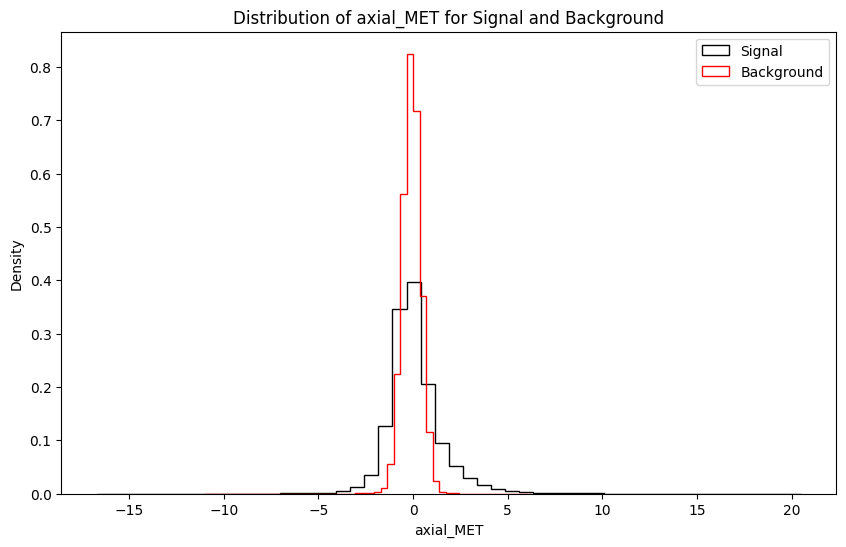

In [26]:
# 5.1
def plot_observable(df_sig, df_bkg, feature, bins=50):

    plt.figure(figsize=(10, 6))
    plt.hist(df_sig[feature], bins=bins, histtype='step', color='black', label='Signal', density=True)
    plt.hist(df_bkg[feature], bins=bins, histtype='step', color='red', label='Background', density=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {feature} for Signal and Background')
    plt.show()

plot_observable(df_sig, df_bkg, 'axial_MET')

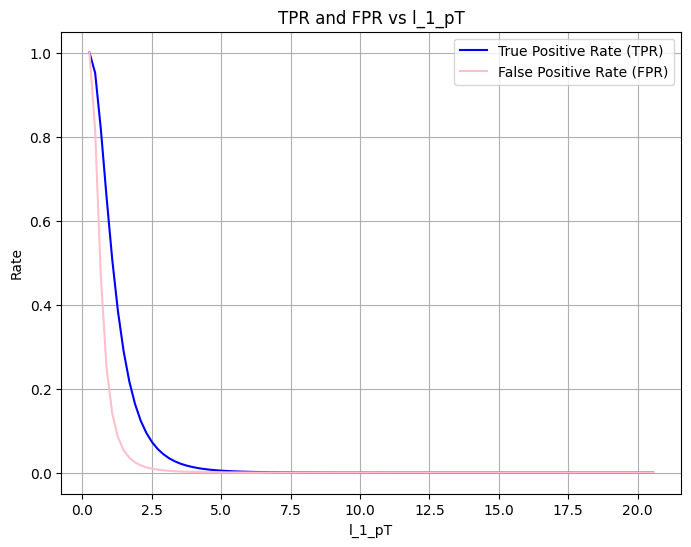

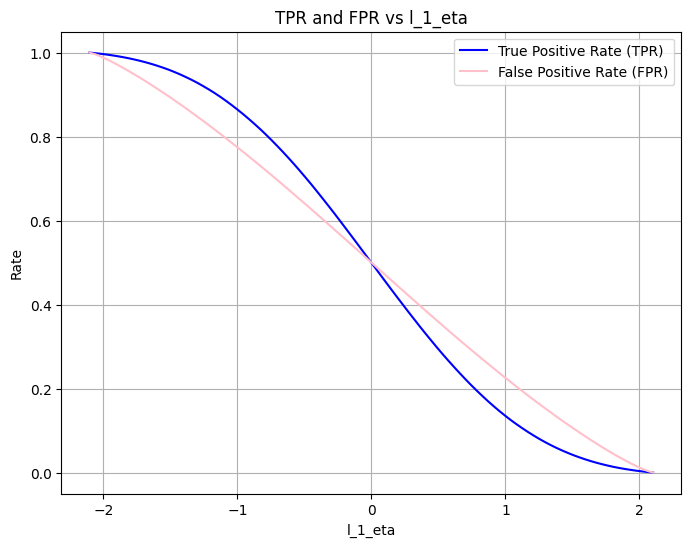

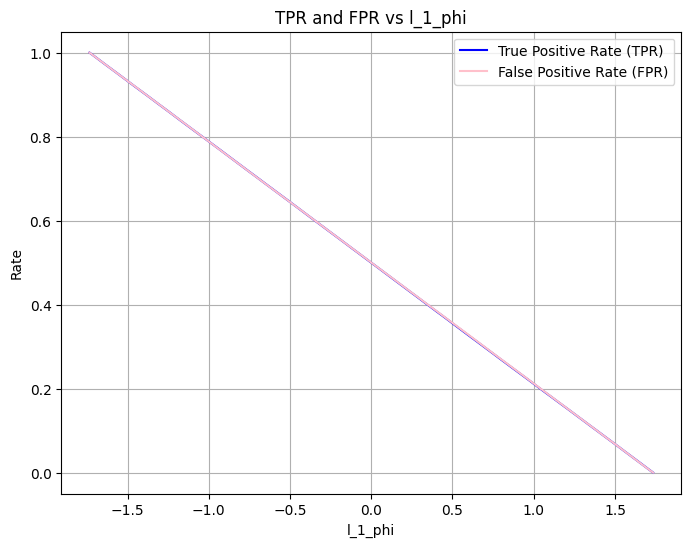

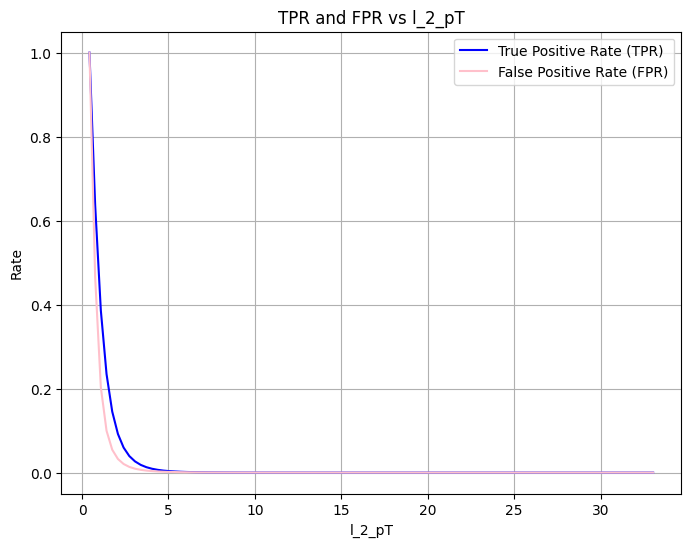

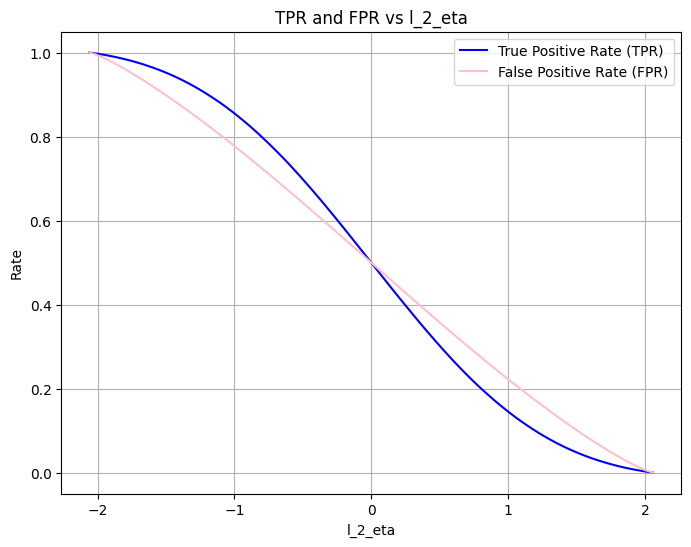

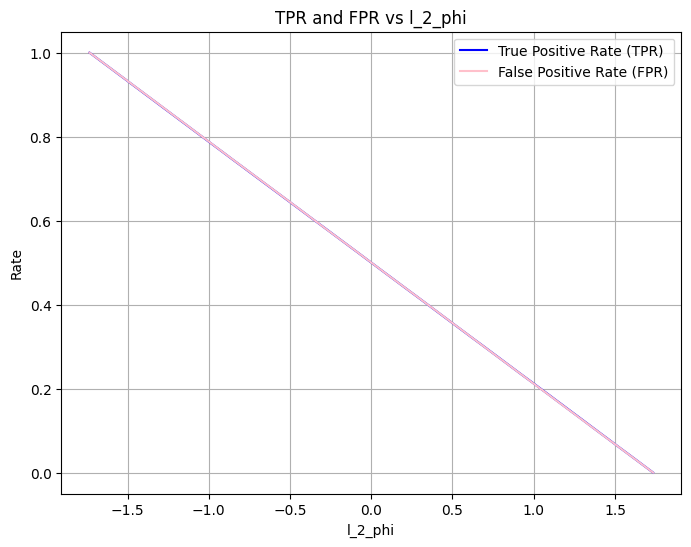

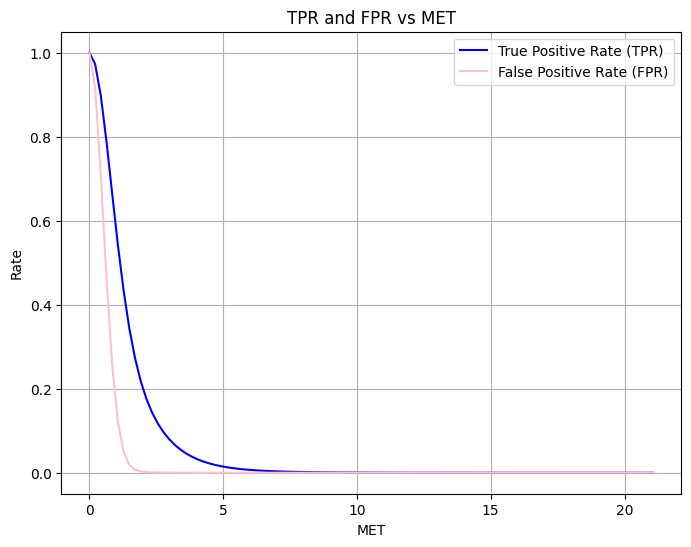

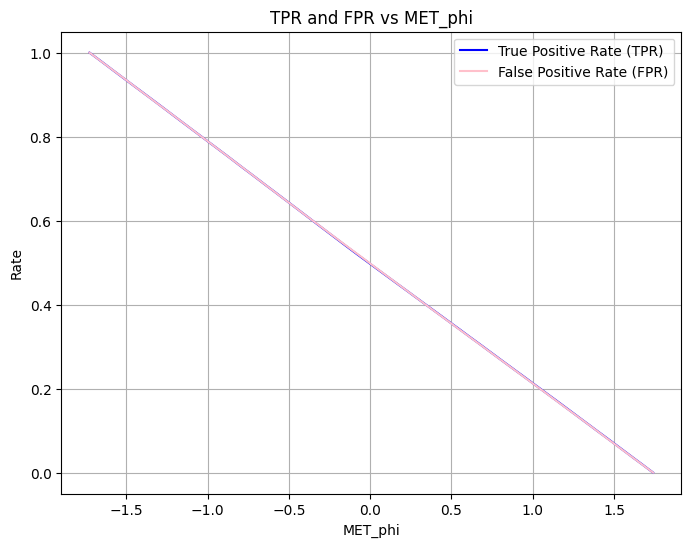

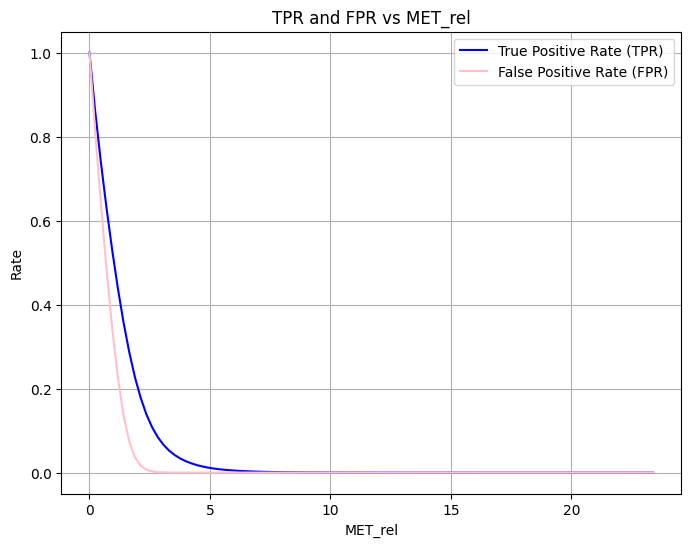

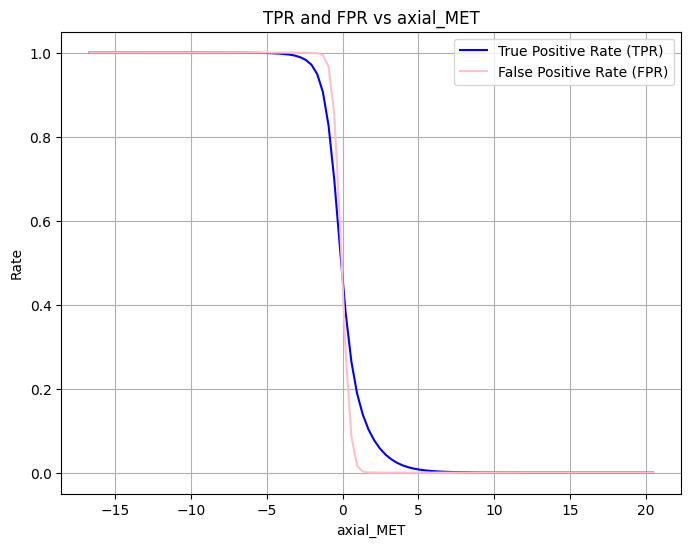

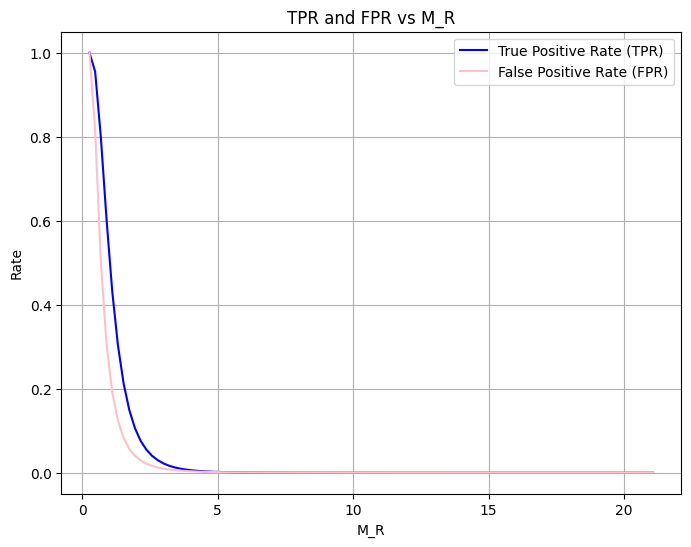

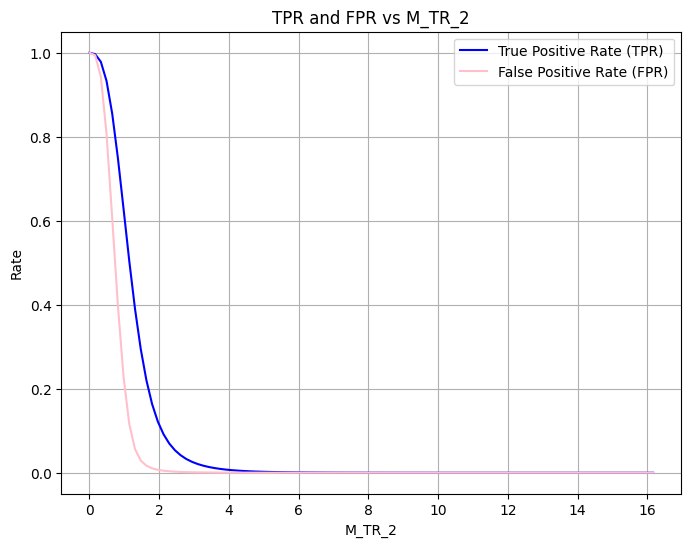

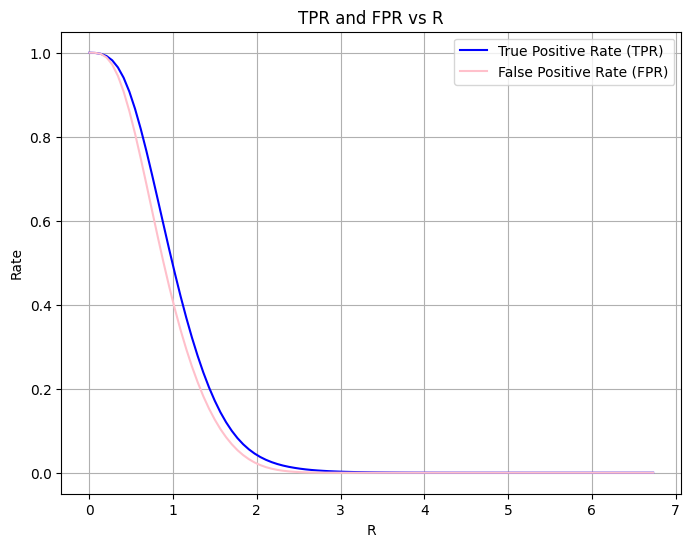

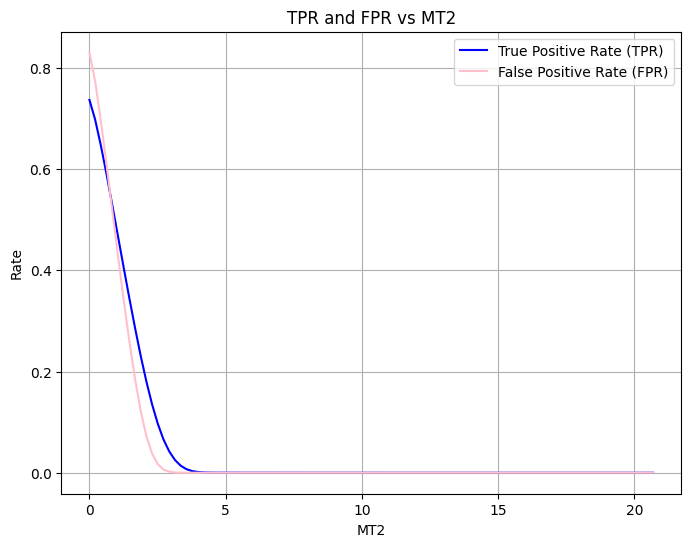

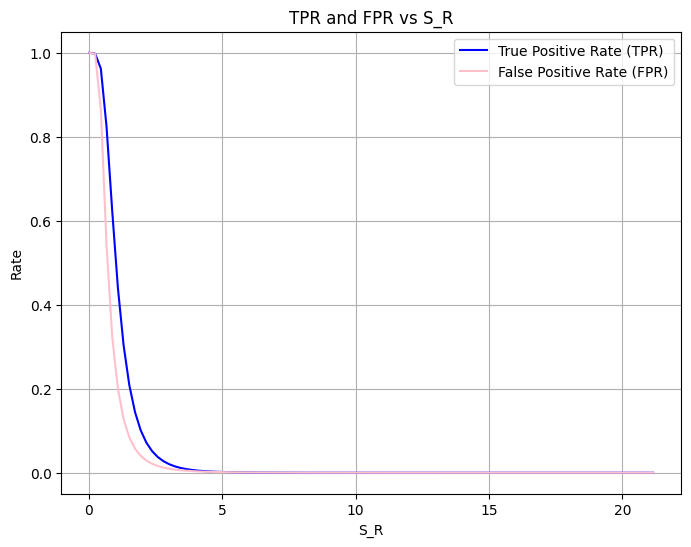

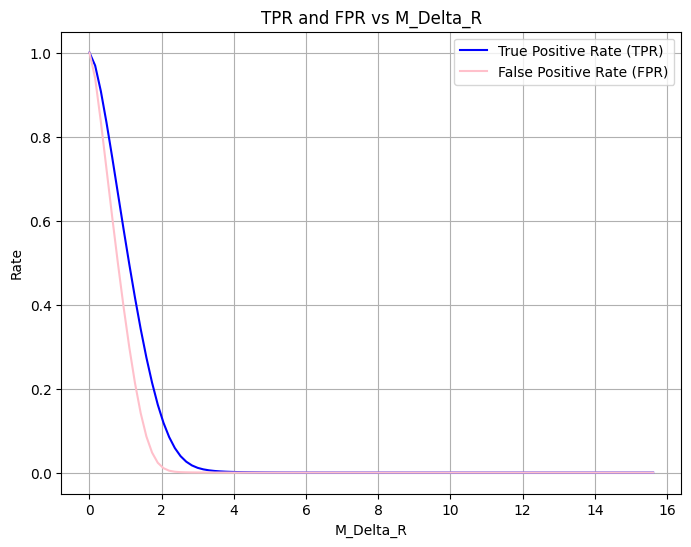

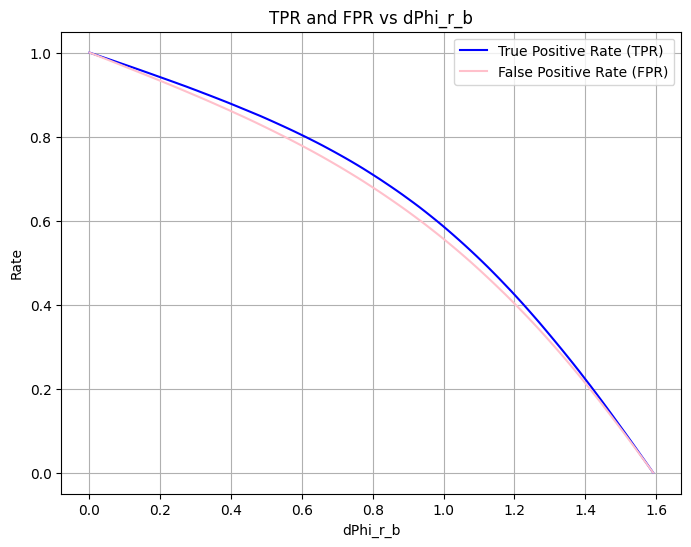

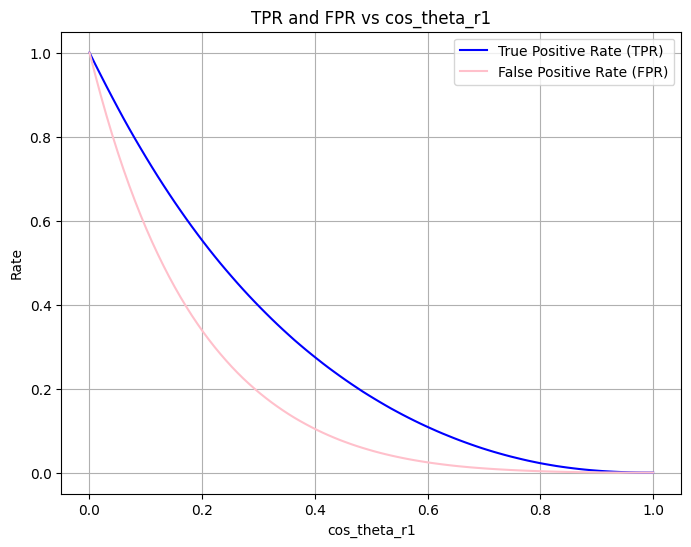

In [27]:
# 5.2
def plot_TPR_FPR(df_sig, df_bkg, feature):
    # Getting the range of values for the feature
    min_val = min(df_sig[feature].min(), df_bkg[feature].min())
    max_val = max(df_sig[feature].max(), df_bkg[feature].max())
    
    # Define a range of xc values to test
    xcs = np.linspace(min_val, max_val, 100)
    
    # Initialize lists to store TPR and FPR values
    tpr = []
    fpr = []
    
    # Calculate TPR and FPR for each xc
    for xc in xcs:
        # True Positive Rate (TPR) for the signal
        tpr.append(np.sum(df_sig[feature] > xc) / len(df_sig))
        
        # False Positive Rate (FPR) for the background
        fpr.append(np.sum(df_bkg[feature] > xc) / len(df_bkg))
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(xcs, tpr, label="True Positive Rate (TPR)", color='blue')
    plt.plot(xcs, fpr, label="False Positive Rate (FPR)", color='pink')
    plt.xlabel(f'{feature}')
    plt.ylabel('Rate')
    plt.title(f'TPR and FPR vs {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of features to analyze
features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] 
for feature in features:
    plot_TPR_FPR(df_sig, df_bkg, feature)


In [29]:
# For each feature, you will get a plot showing: TPR: increasing as Xc increasing, since more
# signal events are selected.
# FDR (pink) increasing as Xc increases, since more backgrounds events are selected.


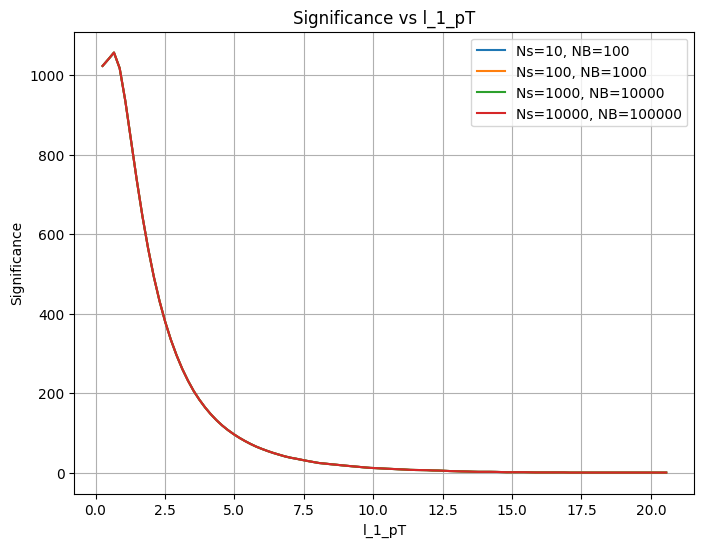

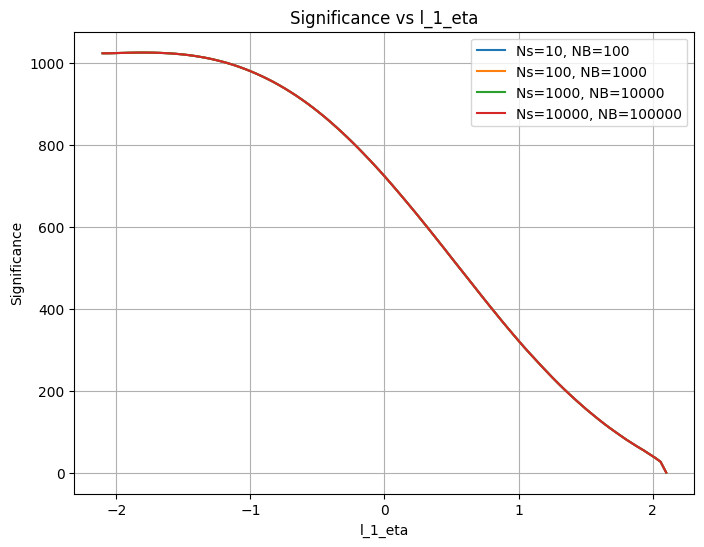

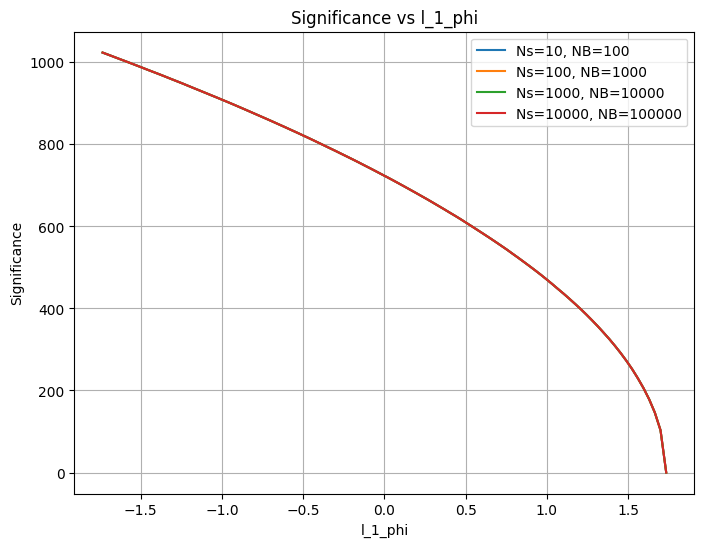

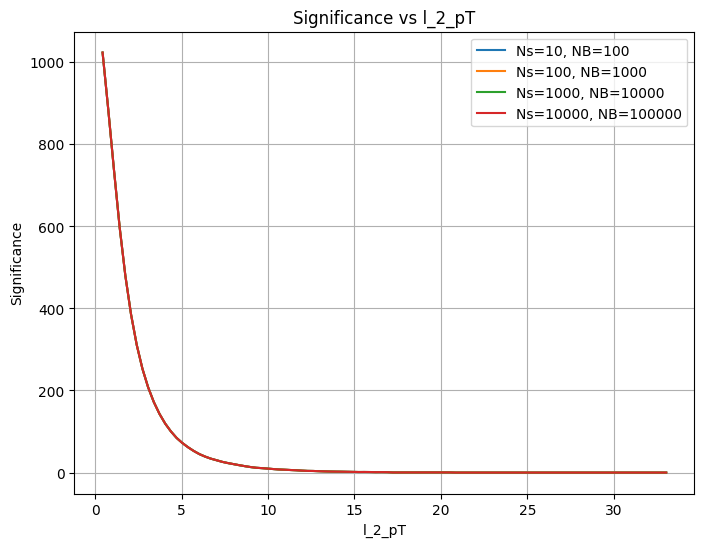

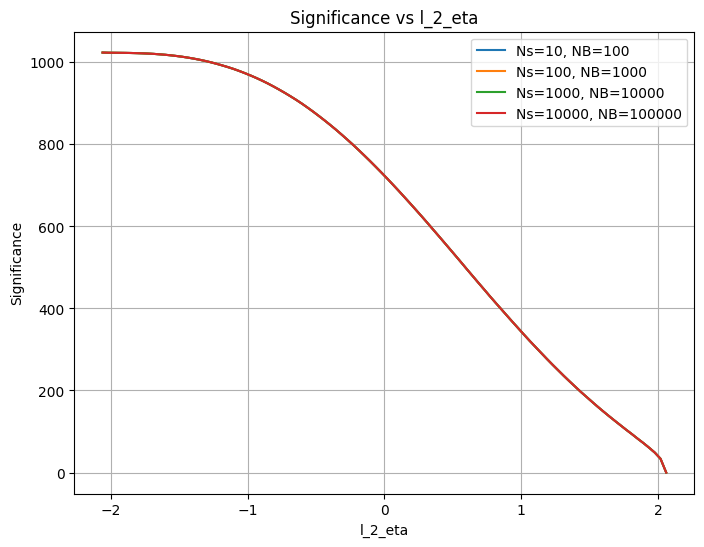

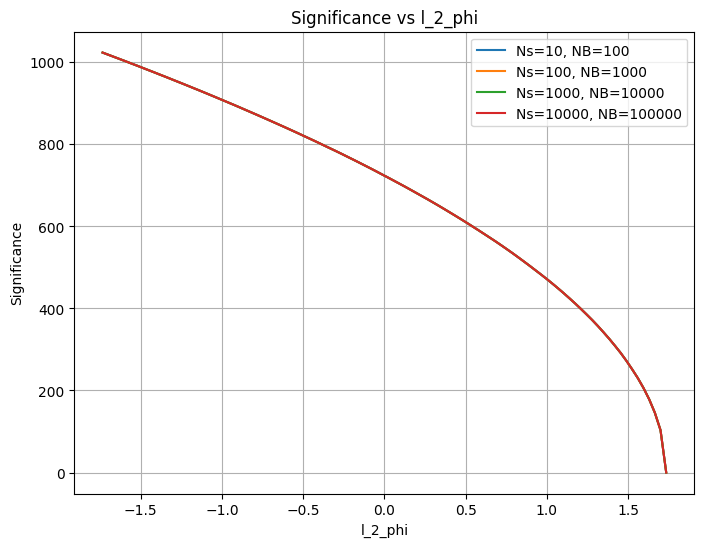

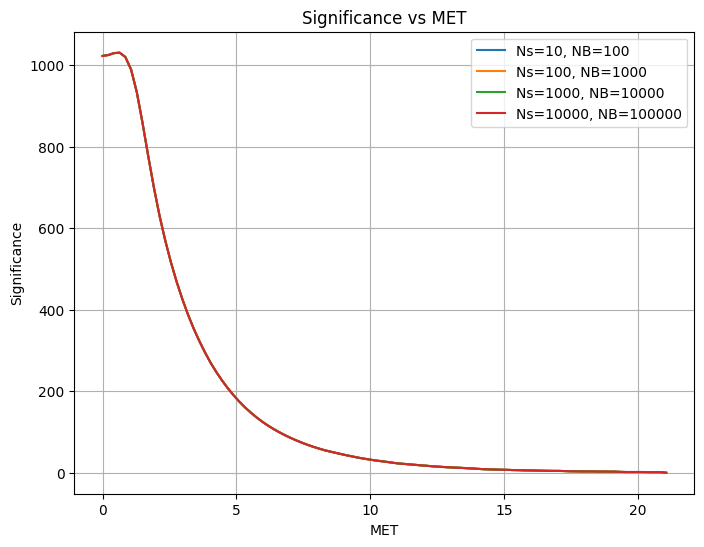

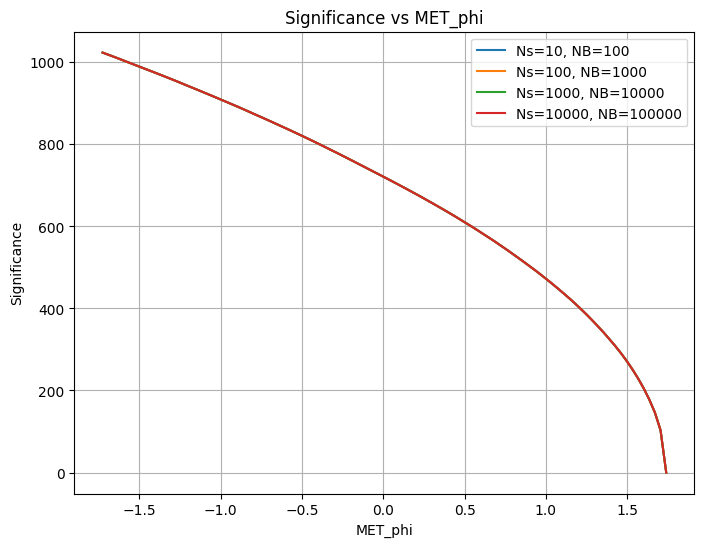

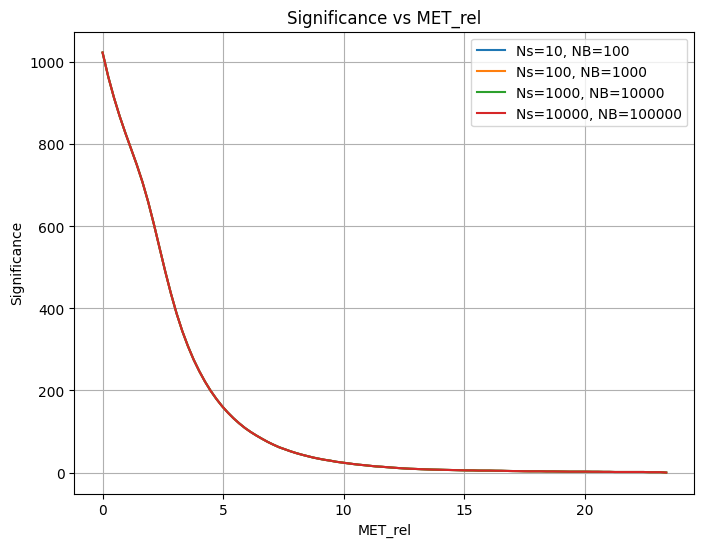

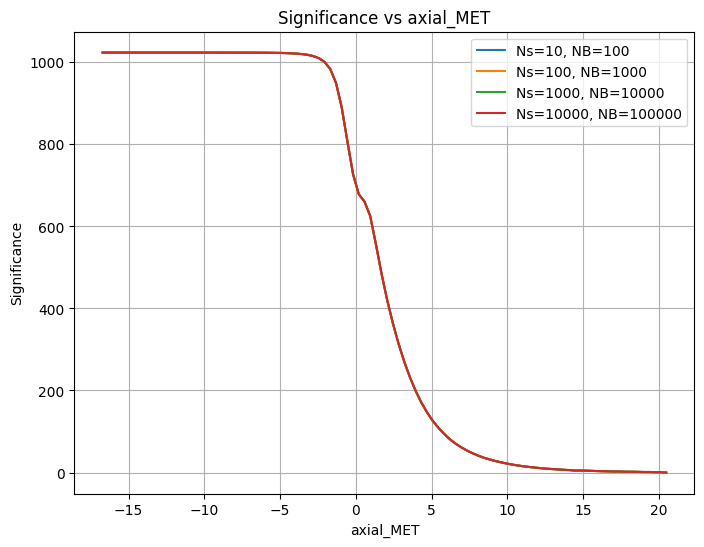

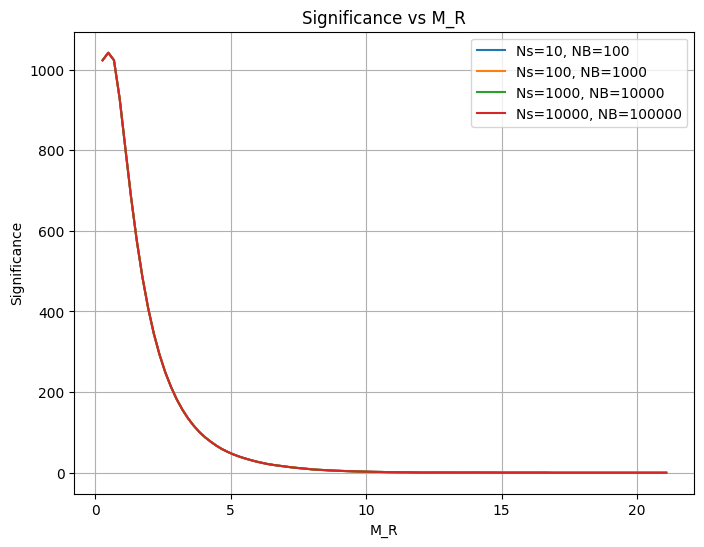

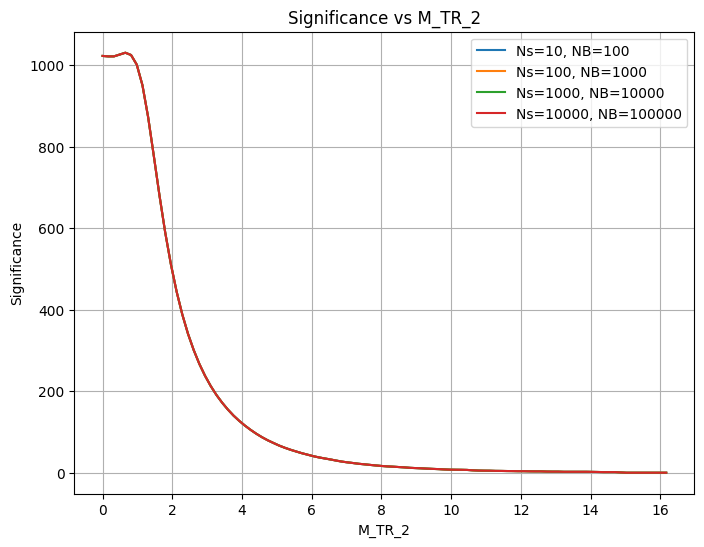

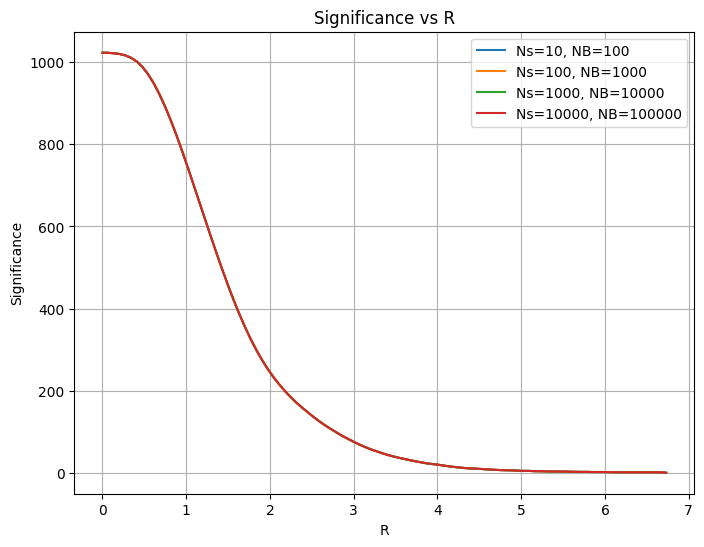

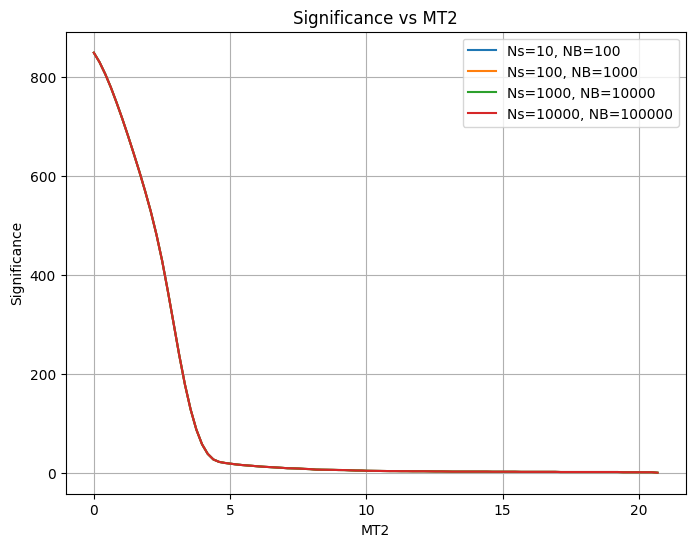

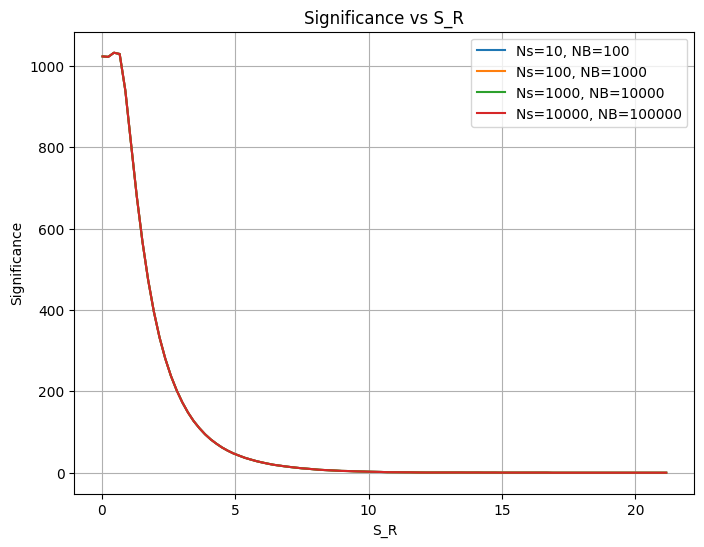

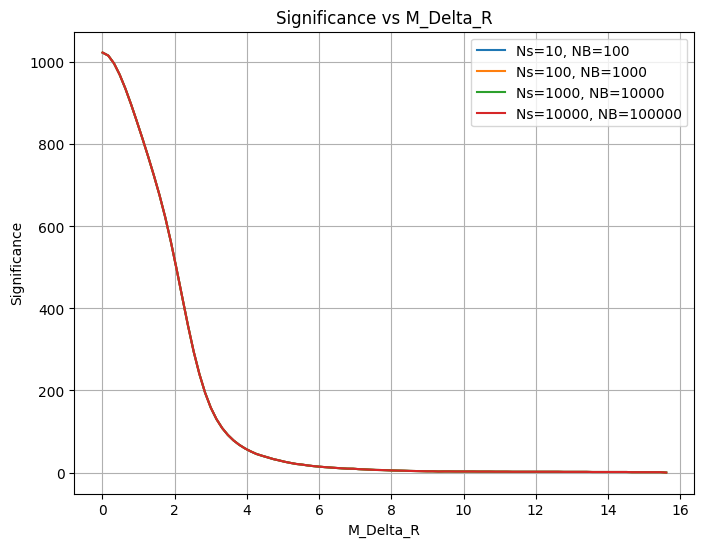

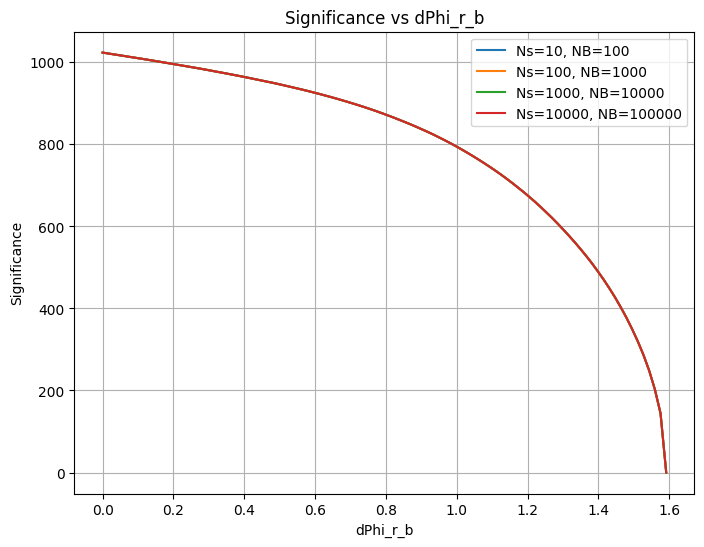

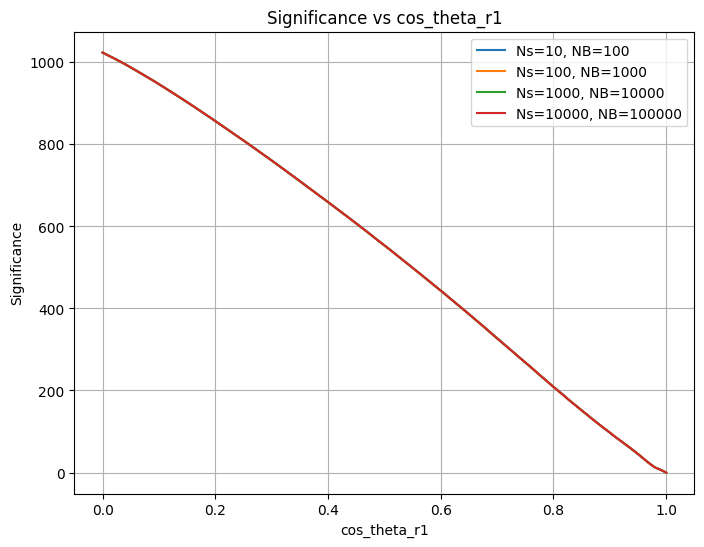

In [30]:
# 5.3
def plot_significance(df_sig, df_bkg, feature, scenarios):
    # Getting the range of values for the feature
    min_val = min(df_sig[feature].min(), df_bkg[feature].min())
    max_val = max(df_sig[feature].max(), df_bkg[feature].max())
    
    # Define a range of xc values to test
    xcs = np.linspace(min_val, max_val, 100)
    
    # Plotting the significance for each scenario
    plt.figure(figsize=(8, 6))
    
    for scenario in scenarios:
        Ns, NB = scenario  # Unpacking the scenario
        
        # Initialize a list to store significance values for the current scenario
        significance = []
        
        # Calculate the significance for each xc in the range
        for xc in xcs:
            N_s = np.sum(df_sig[feature] > xc)
            N_B = np.sum(df_bkg[feature] > xc)
            
            # Calculate the significance
            sig = N_s / np.sqrt(N_s + N_B) if N_s + N_B > 0 else 0
            significance.append(sig)
        
        # Plot the significance for this scenario
        plt.plot(xcs, significance, label=f'Ns={Ns}, NB={NB}')
    
    plt.xlabel(f'{feature}')
    plt.ylabel('Significance')
    plt.title(f'Significance vs {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of features to analyze
features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] 

# Define the four scenarios (Ns, NB)
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

for feature in features:
    plot_significance(df_sig, df_bkg, feature, scenarios)


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




Scenario: Ns=10, Nb=100


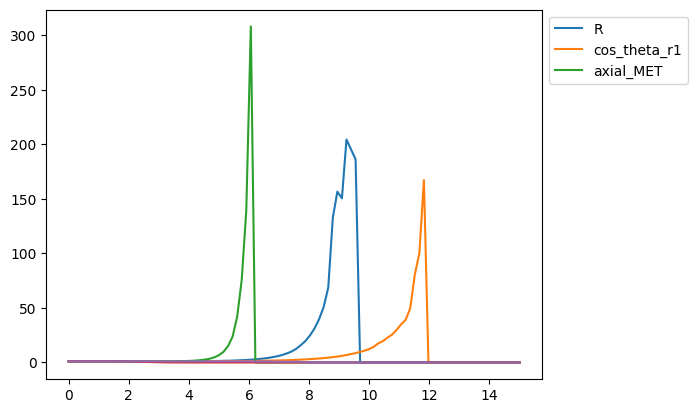

<Figure size 1200x800 with 0 Axes>

Scenario: Ns=100, Nb=1000


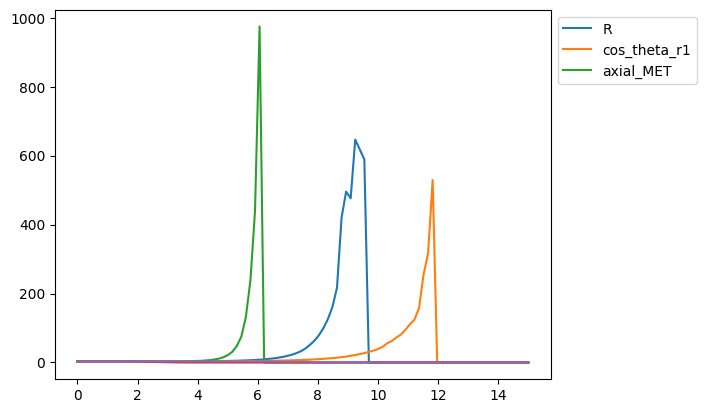

<Figure size 1200x800 with 0 Axes>

Scenario: Ns=1000, Nb=10000


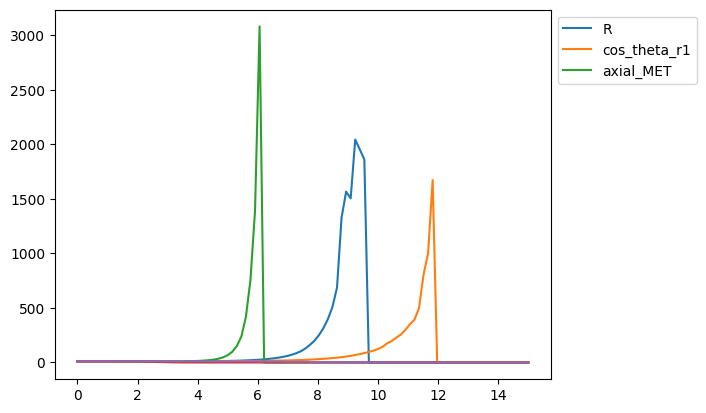

<Figure size 1200x800 with 0 Axes>

Scenario: Ns=10000, Nb=100000


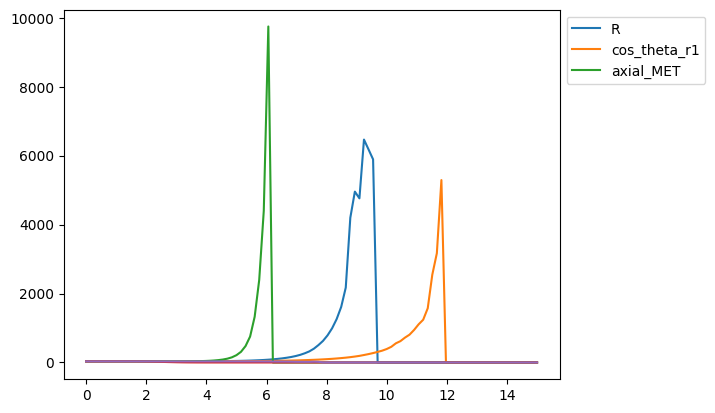

<Figure size 1200x800 with 0 Axes>

In [31]:
# 6.1
def calculate_efficiencies(signal, background, threshold):
    signal_selected = np.sum(signal > threshold)
    background_selected = np.sum(background > threshold)
    tpr = signal_selected / len(signal)  # True Positive Rate
    fpr = background_selected / len(background)  # False Positive Rate
    return tpr, fpr

# Function to compute the significance for different thresholds
def calculate_significance(tpr, fpr, Ns, Nb):
    S = tpr * Ns  # Signal events
    B = fpr * Nb  # Background events
    significance = S / np.sqrt(B) if B > 0 else 0  # Avoid division by zero
    return significance

# Function to plot the significance for each observable and return significance values
def plot_significance(signal, background, Ns, Nb, thresholds, feature_name):
    significances = []
    for threshold in thresholds:
        tpr, fpr = calculate_efficiencies(signal, background, threshold)
        significance = calculate_significance(tpr, fpr, Ns, Nb)
        significances.append(significance)
    
    # Plotting the significance and explicitly adding the label
    line, = plt.plot(thresholds, significances, label=feature_name)  # Label added here
    return significances, line  # Return the line object for legend

# Define scenarios with different Ns and Nb
scenarios = [
    (10, 100),   # Scenario 1: Ns=10, Nb=100
    (100, 1000), # Scenario 2: Ns=100, Nb=1000
    (1000, 10000), # Scenario 3: Ns=1000, Nb=10000
    (10000, 100000) # Scenario 4: Ns=10000, Nb=100000
]

# Example signal and background data for the specified features
np.random.seed(42)
signal_data = {
    "R": np.random.normal(10, 2, 10000),
    "cos_theta_r1": np.random.normal(12, 3, 10000),
    "axial_MET": np.random.normal(8, 1, 10000),
    "l_1_eta": np.random.normal(2.5, 0.5, 10000),
    "MET_rel": np.random.normal(5, 1, 10000),
}

background_data = {
    "R": np.random.normal(5, 1, 100000),
    "cos_theta_r1": np.random.normal(6, 1.5, 100000),
    "axial_MET": np.random.normal(4, 0.5, 100000),
    "l_1_eta": np.random.normal(3, 0.6, 100000),
    "MET_rel": np.random.normal(4.5, 0.8, 100000),
}

# Define a range of thresholds to test (from 0 to 15)
thresholds = np.linspace(0, 15, 100)

# For each scenario, calculate significance for each feature
for Ns, Nb in scenarios:
    print(f"Scenario: Ns={Ns}, Nb={Nb}")
    
    # Calculate significance for each feature
    feature_significance = {}
    lines = []
    
    # Plot for all features
    for feature in signal_data.keys():
        signal = signal_data[feature]
        background = background_data[feature]
        
        significances, line = plot_significance(signal, background, Ns, Nb, thresholds, feature)
        feature_significance[feature] = significances
        lines.append(line)  # Collect the line objects for legend
    
    # Sort features by the maximum significance value and select top 3
    top_features = sorted(feature_significance.items(), key=lambda x: max(x[1]), reverse=True)[:3]
    
    # Manually set the legend to only include the top 3 features
    top_lines = [line for feature, line in zip(feature_significance.keys(), lines) if feature in dict(top_features).keys()]
    
    # Add the legend with only the top 3 features
    plt.legend(handles=top_lines, loc='upper left', bbox_to_anchor=(1, 1))

    # Display the plot
    plt.figure(figsize=(12, 8))  # Adjust the figure size for better display
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()



In [63]:
# 6.2

def calculate_efficiencies_and_significance(signal, background, threshold, Ns, Nb):
    signal_selected = np.sum(signal > threshold)
    background_selected = np.sum(background > threshold)
    
    es = signal_selected / len(signal)  # Signal Efficiency
    eB = background_selected / len(background)  # Background Efficiency
    
    NprimeS = signal_selected  # N'ₛ: Number of signal events after cut
    NprimeB = background_selected  # N'ᵦ: Number of background events after cut
    
    # Calculate significance (sigma_s)
    sigma_s = NprimeS / np.sqrt(NprimeB) if NprimeB > 0 else 0  # Avoid division by zero
    
    return es, eB, NprimeS, NprimeB, sigma_s

# Function to create cut-flow table for each feature and scenario
def create_cut_flow_table(signal_data, background_data, thresholds, Ns, Nb):
    # Prepare a dictionary to store cut-flow data
    cut_flow_data = {}
    
    # Loop through each feature and apply cuts
    for feature in signal_data.keys():
        signal = signal_data[feature]
        background = background_data[feature]
        
        cut_flow_data[feature] = []
        
        for threshold in thresholds:
            # Calculate efficiencies and significance for each threshold
            es, eB, NprimeS, NprimeB, sigma_s = calculate_efficiencies_and_significance(
                signal, background, threshold, Ns, Nb)
            
            # Append the results to the cut-flow data
            cut_flow_data[feature].append({
                'Threshold': threshold, 
                'Signal Efficiency (es)': es,
                'Background Efficiency (eB)': eB,
                'N\'ₛ': NprimeS, 
                'N\'ᵦ': NprimeB, 
                'Significance (σₛ)': sigma_s
            })
    
    return cut_flow_data

scenarios = [
    (10, 100),   # Scenario 1: Ns=10, Nb=100
    (100, 1000), # Scenario 2: Ns=100, Nb=1000
    (1000, 10000), # Scenario 3: Ns=1000, Nb=10000
    (10000, 100000) # Scenario 4: Ns=10000, Nb=100000
]

# Example signal and background data for the specified features
np.random.seed(42)
signal_data = {
    "R": np.random.normal(10, 2, 10000),
    "cos_theta_r1": np.random.normal(12, 3, 10000),
    "axial_MET": np.random.normal(8, 1, 10000),
    "l_1_eta": np.random.normal(2.5, 0.5, 10000),
    "MET_rel": np.random.normal(5, 1, 10000),
}

background_data = {
    "R": np.random.normal(5, 1, 100000),
    "cos_theta_r1": np.random.normal(6, 1.5, 100000),
    "axial_MET": np.random.normal(4, 0.5, 100000),
    "l_1_eta": np.random.normal(3, 0.6, 100000),
    "MET_rel": np.random.normal(4.5, 0.8, 100000),
}

#
thresholds = np.linspace(0, 15, 10)


for Ns, Nb in scenarios:
    print(f"Scenario: Ns={Ns}, Nb={Nb}")
    
    # Create cut-flow table 
    cut_flow_data = create_cut_flow_table(signal_data, background_data, thresholds, Ns, Nb)
    
    # Convert cut-flow data to DataFrame for easy tabulation
    for feature, data in cut_flow_data.items():
        df = pd.DataFrame(data)
        print(f"\nCut-Flow Table for {feature}:")
        print(df)
        print('-' * 50)


Scenario: Ns=10, Nb=100

Cut-Flow Table for R:
   Threshold  Signal Efficiency (es)  Background Efficiency (eB)    N'ₛ  \
0   0.000000                  1.0000                     1.00000  10000   
1   1.666667                  1.0000                     0.99962  10000   
2   3.333333                  0.9996                     0.95219   9996   
3   5.000000                  0.9934                     0.50137   9934   
4   6.666667                  0.9509                     0.04830   9509   
5   8.333333                  0.7963                     0.00040   7963   
6  10.000000                  0.4992                     0.00000   4992   
7  11.666667                  0.2014                     0.00000   2014   
8  13.333333                  0.0477                     0.00000    477   
9  15.000000                  0.0068                     0.00000     68   

      N'ᵦ  Significance (σₛ)  
0  100000          31.622777  
1   99962          31.628787  
2   95219          32.393990  
3  

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [36]:
from sklearn.metrics import roc_curve, auc

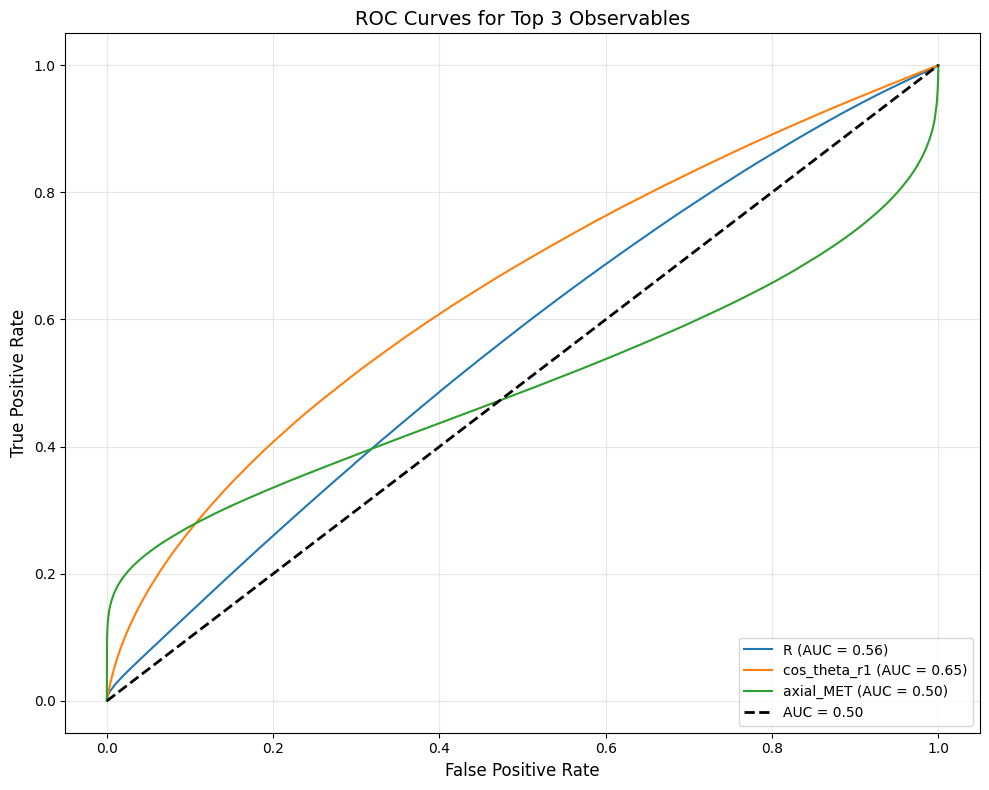

In [37]:
# 7.1

y_true = df['signal'] #truth labels 1 for signal and 0 for background
observables = ['R', 'cos_theta_r1', 'axial_MET']  #3
plt.figure(figsize=(10, 8))

for observable in observables:
    y_scores = df[observable].values  
    fpr, tpr, _ = roc_curve(y_true, y_scores)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # AUC
    
    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f'{observable} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="AUC = 0.50")


plt.title("ROC Curves for Top 3 Observables", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Higher values indicate better performance. R is not particularly effective at separating the signal from the background. cos_theta_r1's AUC correctly rank a signal event higher than a background event about 65% of the time.

In [38]:
# 7.2
def plot_roc_curves(df, observables, condition=None, title="ROC Curves", cumulative=False):
    if condition:
        df = df[condition(df)]
    
    # Extract ground truth
    y_true = df['signal']
    
    plt.figure(figsize=(8, 6))
    
    for observable in observables:
        y_scores = df[observable].values
        
        # Apply cumulative sum if requested
        if cumulative:
            y_scores = np.cumsum(y_scores)
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{observable} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line (random guess)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess (AUC = 0.50)")
    
    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
# 7.3

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [40]:
def compute_sb_sw(df, features, label_column='signal'):
    # 
    class1 = df[df[label_column] == 1][features].values  # Signal
    class2 = df[df[label_column] == 0][features].values  # Background

    # Compute means
    mu = df[features].mean(axis=0).values  # 
    mu1 = class1.mean(axis=0)  # vector for signal
    mu2 = class2.mean(axis=0)  # vector for background

    # Compute SB 
    N1 = class1.shape[0]  # Number of signal samples
    N2 = class2.shape[0]  # Number of background samples
    SB = N1 * np.outer(mu1 - mu, mu1 - mu) + N2 * np.outer(mu2 - mu, mu2 - mu)

    # Compute SW (Within-class covariance matrix)
    SW = np.zeros((len(features), len(features)))  
    for x in class1:
        SW += np.outer(x - mu1, x - mu1)  #
    for x in class2:
        SW += np.outer(x - mu2, x - mu2)  #

    return SB, SW
features = ['R', 'cos_theta_r1', 'axial_MET']  
SB, SW = compute_sb_sw(df, features)

print("Between-class covariance matrix (SB):\n", SB)
print("\nWithin-class covariance matrix (SW):\n", SW)

Between-class covariance matrix (SB):
 [[13888.77632418 13952.04201984 20344.08246195]
 [13952.04201984 14015.59590131 20436.75315514]
 [20344.08246195 20436.75315514 29799.72328433]]

Within-class covariance matrix (SW):
 [[1094565.54760366  276945.13448251 -928542.21766307]
 [ 276945.13448251  179990.80875477 -291064.8017134 ]
 [-928542.21766307 -291064.8017134  4986147.07168972]]


In [41]:
def compute_lda_coefficients(df, features, label_column='signal'):
    class1 = df[df[label_column] == 1][features].values  # Signal
    class2 = df[df[label_column] == 0][features].values  # Background

    mu1 = class1.mean(axis=0)  # Mean vector for signal
    mu2 = class2.mean(axis=0)  # Mean vector for background

    SW = np.zeros((len(features), len(features)))  # Initialize
    for x in class1:
        SW += np.outer(x - mu1, x - mu1)  # Add signal contributions
    for x in class2:
        SW += np.outer(x - mu2, x - mu2)  # Add background contributions

    # Compute the linear coefficients
    mean_diff = mu1 - mu2  # Difference of the mean vectors
    SW_inv = np.linalg.inv(SW)  # Inverse of the within-class covariance matrix
    w = SW_inv @ mean_diff  # Compute linear coefficients

    return w
features = ['R', 'cos_theta_r1', 'axial_MET']  # Observables
w = compute_lda_coefficients(df, features)

print("LDA Linear Coefficients (w):\n", w)

LDA Linear Coefficients (w):
 [-3.71571979e-08  7.58249314e-07  6.84211861e-08]
